In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://finance.yahoo.co.jp/quote/998407.O/history?from=20200101&to=20230131&timeFrame=d&page=19

# メモ

①

nikkeiheikin.csv　→　nikkeiheikin_data

nikkeiheikin_dataのnaを除いた　→　nikkeiheikin_data_nan

②

PCR_kouseiroudoushou.csv　→　PCR_data

③

newly_confirmed_cases_daily-3.csv　→　kansen_todouhuken

②・③

kansen_todouhukenとPCR_dataをマージ　→　kansen_todouhuken_andPCR

①・③

nikkeiheikin_dataとkansen_todouhukenをマージ　→　kansen_nikkeiheikin

→ hajimene_list, takane_list, yasune_list, owarine_list

kansen_nikkeiheikin''始値''(hamimene_list)のピン分割　→ kansen_nikkeiheikin_data

kansen_nikkeiheikin[['始値','高値','安値','終値']] #'日付'　→　nikkeiheikin5

# nikkeiheikin_data

## データ読み込み

In [2]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

In [3]:
input_file_path = '/content/drive/MyDrive/Colab Notebooks/csvファイル/nikkeiheikin.csv'
with open(input_file_path, 'rb') as input_file:
    input_text = input_file.read()
input_text

b'\xef\xbb\xbf\xe6\x97\xa5\xe4\xbb\x98,\xe5\xa7\x8b\xe5\x80\xa4,\xe9\xab\x98\xe5\x80\xa4,\xe5\xae\x89\xe5\x80\xa4,\xe7\xb5\x82\xe5\x80\xa4\r\n2020/1/6,"23,319.76","23,365.36","23,148.53","23,204.86"\r\n2020/1/7,"23,320.12","23,577.44","23,299.92","23,575.72"\r\n2020/1/8,"23,217.49","23,303.21","22,951.18","23,204.76"\r\n2020/1/9,"23,530.29","23,767.09","23,506.15","23,739.87"\r\n2020/1/10,"23,813.28","23,903.29","23,761.08","23,850.57"\r\n2020/1/11,,,,\r\n2020/1/12,,,,\r\n2020/1/13,,,,\r\n2020/1/14,"23,969.04","24,059.86","23,951.66","24,025.17"\r\n2020/1/15,"23,923.48","23,997.39","23,875.82","23,916.58"\r\n2020/1/16,"23,960.20","23,975.38","23,905.38","23,933.13"\r\n2020/1/17,"24,103.45","24,115.95","24,013.75","24,041.26"\r\n2020/1/18,,,,\r\n2020/1/19,,,,\r\n2020/1/20,"24,080.68","24,108.11","24,061.67","24,083.51"\r\n2020/1/21,"24,072.81","24,081.75","23,843.48","23,864.56"\r\n2020/1/22,"23,835.49","24,040.87","23,831.10","24,031.35"\r\n2020/1/23,"23,843.51","23,910.01","23,779.23"

In [4]:
nikkeiheikin_data = pd.read_csv(input_file_path)

In [5]:
nikkeiheikin_data = nikkeiheikin_data[:1481]

In [6]:
nikkeiheikin_data

日付         始値         高値         安値         終値
0      2020/1/6  23,319.76  23,365.36  23,148.53  23,204.86
1      2020/1/7  23,320.12  23,577.44  23,299.92  23,575.72
2      2020/1/8  23,217.49  23,303.21  22,951.18  23,204.76
3      2020/1/9  23,530.29  23,767.09  23,506.15  23,739.87
4     2020/1/10  23,813.28  23,903.29  23,761.08  23,850.57
...         ...        ...        ...        ...        ...
1476  2024/1/21        NaN        NaN        NaN        NaN
1477  2024/1/22  36,294.10  36,571.80  36,225.91  36,546.95
1478  2024/1/23  36,605.30  36,984.51  36,436.07  36,517.57
1479  2024/1/24  36,415.66  36,471.39  36,104.89  36,226.48
1480  2024/1/25  36,213.14  36,312.36  35,912.54  36,236.47

[1481 rows x 5 columns]

In [ ]:
hajimene1 = nikkeiheikin_data.loc[:,'始値']
takane1 = nikkeiheikin_data.loc[:,'高値']
yasune1 = nikkeiheikin_data.loc[:,'安値']
owarine1 = nikkeiheikin_data.loc[:,'終値']

In [ ]:
hajimene_list1 = []
for i in range(len(hajimene1)):
  hajimene_str_list1 = str(hajimene1[i]).split(',')
  hajimene_plus1 = ''
  for j in range(len(hajimene_str_list1)):
    hajimene_plus1 += hajimene_str_list1[j]
  hajimene_list1.append(float(hajimene_plus1))

In [ ]:
takane_list1 = []
for i in range(len(takane1)):
  takane_str_list1 = str(takane1[i]).split(',')
  takane_plus1 = ''
  for j in range(len(takane_str_list1)):
    takane_plus1 += takane_str_list1[j]
  takane_list1.append(float(takane_plus1))

In [ ]:
yasune_list1 = []
for i in range(len(yasune1)):
  yasune_str_list1 = str(yasune1[i]).split(',')
  yasune_plus1 = ''
  for j in range(len(yasune_str_list1)):
    yasune_plus1 += yasune_str_list1[j]
  yasune_list1.append(float(yasune_plus1))

In [ ]:
owarine_list1 = []
for i in range(len(owarine1)):
  owarine_str_list1 = str(owarine1[i]).split(',')
  owarine_plus1 = ''
  for j in range(len(owarine_str_list1)):
    owarine_plus1 += owarine_str_list1[j]
  owarine_list1.append(float(owarine_plus1))

In [ ]:
nikkeiheikin_data['始値'] = hajimene_list1
nikkeiheikin_data['高値'] = takane_list1
nikkeiheikin_data['安値'] = yasune_list1
nikkeiheikin_data['終値'] = owarine_list1

In [ ]:
nikkeiheikin_data

日付        始値        高値        安値        終値
0      2020/1/6  23319.76  23365.36  23148.53  23204.86
1      2020/1/7  23320.12  23577.44  23299.92  23575.72
2      2020/1/8  23217.49  23303.21  22951.18  23204.76
3      2020/1/9  23530.29  23767.09  23506.15  23739.87
4     2020/1/10  23813.28  23903.29  23761.08  23850.57
...         ...       ...       ...       ...       ...
1476  2024/1/21       NaN       NaN       NaN       NaN
1477  2024/1/22  36294.10  36571.80  36225.91  36546.95
1478  2024/1/23  36605.30  36984.51  36436.07  36517.57
1479  2024/1/24  36415.66  36471.39  36104.89  36226.48
1480  2024/1/25  36213.14  36312.36  35912.54  36236.47

[1481 rows x 5 columns]

In [ ]:
nikkeiheikin_data['始値'].describe()

count      993.000000
mean     27510.198369
std       3556.199484
min      16570.570000
25%      26251.340000
50%      27752.990000
75%      29306.140000
max      36605.300000
Name: 始値, dtype: float64

# nikkeiheikin_data.dropna()

In [ ]:
nikkeiheikin_data_nan = nikkeiheikin_data.dropna()

In [ ]:
nikkeiheikin_data_nan

日付        始値        高値        安値        終値
0      2020/1/6  23319.76  23365.36  23148.53  23204.86
1      2020/1/7  23320.12  23577.44  23299.92  23575.72
2      2020/1/8  23217.49  23303.21  22951.18  23204.76
3      2020/1/9  23530.29  23767.09  23506.15  23739.87
4     2020/1/10  23813.28  23903.29  23761.08  23850.57
...         ...       ...       ...       ...       ...
1474  2024/1/19  35913.72  36076.23  35790.07  35963.27
1477  2024/1/22  36294.10  36571.80  36225.91  36546.95
1478  2024/1/23  36605.30  36984.51  36436.07  36517.57
1479  2024/1/24  36415.66  36471.39  36104.89  36226.48
1480  2024/1/25  36213.14  36312.36  35912.54  36236.47

[993 rows x 5 columns]

# kansen_event

In [ ]:
input_file_path = '/content/drive/MyDrive/Colab Notebooks/csvファイル/covid19_events.csv'
with open(input_file_path, 'rb') as input_file:
    input_text = input_file.read()
input_text

b'\xef\xbb\xbf\xe6\x97\xa5\xe4\xbb\x98,\xe5\x87\xba\xe6\x9d\xa5\xe4\xba\x8b,\xe3\x83\x9e\xe3\x83\xbc\xe3\x82\xaf1,\xe3\x83\x9e\xe3\x83\xbc\xe3\x82\xaf2,\xe3\x83\x9e\xe3\x83\xbc\xe3\x82\xaf3\r\n2020/1/1,\xe4\xb8\xad\xe5\x9b\xbd\xe3\x81\xab\xe5\xaf\xbe\xe3\x81\x97\xe3\x81\xa6\xe6\x83\x85\xe5\xa0\xb1\xe6\x8f\x90\xe4\xbe\x9b\xe3\x82\x92\xe6\xb1\x82\xe3\x82\x81\xe3\x82\x8b,,,\r\n2020/1/2,,,,\r\n2020/1/3,\xe4\xb8\xad\xe5\x9b\xbd\xe3\x81\x8b\xe3\x82\x89\xe6\xad\xa6\xe6\xbc\xa2\xe5\xb8\x82\xe3\x81\xae\xe3\x82\xaf\xe3\x83\xa9\xe3\x82\xb9\xe3\x82\xbf\xe3\x83\xbc\xe3\x81\xab\xe9\x96\xa2\xe3\x81\x99\xe3\x82\x8b\xe6\x83\x85\xe5\xa0\xb1\xe6\x8f\x90\xe4\xbe\x9b,,,\r\n2020/1/4,,,,\r\n2020/1/5,\xe5\x9b\xbd\xe9\x9a\x9b\xe4\xbf\x9d\xe5\x81\xa5\xe8\xa6\x8f\xe5\x89\x87(International Health Regulations:IHR)\xe3\x81\xab\xe5\x9f\xba\xe3\x81\xa5\xe3\x81\x84\xe3\x81\xa6\xe4\xb8\x96\xe7\x95\x8c\xe3\x81\xab\xe5\x85\xac\xe8\xa1\xa8,,,\r\n2020/1/6,,,,\r\n2020/1/7,,,,\r\n2020/1/8,,,,\r\n2020/1/9,WHO\xe3\x81\xaf\xe3\

In [ ]:
covid19_events = pd.read_csv(input_file_path)

In [ ]:
covid19_events = covid19_events[:1481]

In [ ]:
covid19_events

日付                                                出来事  マーク1  \
0       2020/1/1                                     中国に対して情報提供を求める   NaN   
1       2020/1/2                                                NaN   NaN   
2       2020/1/3                              中国から武漢市のクラスターに関する情報提供   NaN   
3       2020/1/4                                                NaN   NaN   
4       2020/1/5  国際保健規則(International Health Regulations:IHR)に基...   NaN   
...          ...                                                ...   ...   
1456  2023/12/27                                                NaN   NaN   
1457  2023/12/28                                                NaN   NaN   
1458  2023/12/29                                                NaN   NaN   
1459  2023/12/30                                                NaN   NaN   
1460  2023/12/31                                                NaN   NaN   

      マーク2  マーク3  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  
...    ...   ...  
1456   NaN   NaN  
1457   NaN   NaN  
1458   NaN   NaN  
1459   NaN   NaN  
1460   NaN   NaN  

[1461 rows x 5 columns]

# PCR_data

## データ読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from numpy import random# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline# 小数第3位まで表示%precision 3

UsageError: unrecognized arguments: 小数第3位まで表示%precision 3


In [ ]:
input_file_path_PCR = '/content/drive/MyDrive/Colab Notebooks/csvファイル/PCR_kouseiroudoushou.csv'

with open(input_file_path_PCR, 'rb') as input_file:
    input_text_PCR = input_file.read()

In [ ]:
input_text_PCR

b'\xef\xbb\xbf\xe6\x97\xa5\xe4\xbb\x98,PCR \xe6\xa4\x9c\xe6\x9f\xbb\xe5\xae\x9f\xe6\x96\xbd\xe4\xba\xba\xe6\x95\xb0(\xe5\x8d\x98\xe6\x97\xa5)\r\n2020/2/5,4\r\n2020/2/6,19\r\n2020/2/7,9\r\n2020/2/8,4\r\n2020/2/9,10\r\n2020/2/10,12\r\n2020/2/11,4\r\n2020/2/12,10\r\n2020/2/13,16\r\n2020/2/14,43\r\n2020/2/15,86\r\n2020/2/16,65\r\n2020/2/17,113\r\n2020/2/18,9\r\n2020/2/19,71\r\n2020/2/20,90\r\n2020/2/21,85\r\n2020/2/22,96\r\n2020/2/23,39\r\n2020/2/24,104\r\n2020/2/25,44\r\n2020/2/26,168\r\n2020/2/27,151\r\n2020/2/28,130\r\n2020/2/29,178\r\n2020/3/1,96\r\n2020/3/2,71\r\n2020/3/3,153\r\n2020/3/4,3940\r\n2020/3/5,699\r\n2020/3/6,553\r\n2020/3/7,147\r\n2020/3/8,110\r\n2020/3/9,1314\r\n2020/3/10,424\r\n2020/3/11,181\r\n2020/3/12,1855\r\n2020/3/13,859\r\n2020/3/14,107\r\n2020/3/15,42\r\n2020/3/16,2083\r\n2020/3/17,203\r\n2020/3/18,\r\n2020/3/19,3490\r\n2020/3/20,119\r\n2020/3/21,132\r\n2020/3/22,56\r\n2020/3/23,3862\r\n2020/3/24,\r\n2020/3/25,674\r\n2020/3/26,1805\r\n2020/3/27,1442\r\n2020/3/28,2

In [ ]:
PCR_data = pd.read_csv(input_file_path_PCR)

In [ ]:
PCR_data

日付  PCR 検査実施人数(単日)
0     2020/2/5             4.0
1     2020/2/6            19.0
2     2020/2/7             9.0
3     2020/2/8             4.0
4     2020/2/9            10.0
...        ...             ...
1184  2023/5/4         42382.0
1185  2023/5/5         26270.0
1186  2023/5/6         15616.0
1187  2023/5/7         19627.0
1188  2023/5/8         11050.0

[1189 rows x 2 columns]

# メモ

①

nikkeiheikin.csv　→　nikkeiheikin_data

nikkeiheikin_dataのnaを除いた　→　nikkeiheikin_data_nan

②

PCR_kouseiroudoushou.csv　→　PCR_data

③

newly_confirmed_cases_daily-3.csv　→　kansen_todouhuken

②・③

kansen_todouhukenとPCR_dataをマージ　→　kansen_todouhuken_andPCR

①・③

nikkeiheikin_dataとkansen_todouhukenをマージ　→　kansen_nikkeiheikin

→ hajimene_list, takane_list, yasune_list, owarine_list

kansen_nikkeiheikin''始値''(hamimene_list)のピン分割　→ kansen_nikkeiheikin_data

kansen_nikkeiheikin[['始値','高値','安値','終値']] #'日付'　→　nikkeiheikin5

# kansen_todouhuken

## データ読み込み

In [ ]:
input_file_path_kansen_todouhuken = '/content/drive/MyDrive/Colab Notebooks/csvファイル/newly_confirmed_cases_daily-3.csv'

with open(input_file_path_kansen_todouhuken, 'rb') as input_file:
    input_text_kansen_todouhuken = input_file.read()

In [ ]:
input_text_kansen_todouhuken

b'\xe6\x97\xa5\xe4\xbb\x98,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa\r\n2020/1/16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n2020/1/17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n2020/1/18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n2020/1/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n2020/1/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n2020/1/21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
kansen_todouhuken = pd.read_csv(input_file_path_kansen_todouhuken)

In [ ]:
kansen_todouhuken

日付    ALL  Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  \
0     2020/1/16      1         0       0      0       0      0         0   
1     2020/1/17      0         0       0      0       0      0         0   
2     2020/1/18      0         0       0      0       0      0         0   
3     2020/1/19      0         0       0      0       0      0         0   
4     2020/1/20      0         0       0      0       0      0         0   
...         ...    ...       ...     ...    ...     ...    ...       ...   
1204   2023/5/4   7303       474      48     53     188     35        63   
1205   2023/5/5   5793       354      74     61     105     36        56   
1206   2023/5/6   6257       446      61     84     154     38        79   
1207   2023/5/7  14344       658     127    116     293    133       117   
1208   2023/5/8   9489       577      87     68     208     57       107   

      Fukushima  Ibaraki  ...  Ehime  Kochi  Fukuoka  Saga  Nagasaki  \
0             0        0  ...      0      0        0     0         0   
1             0        0  ...      0      0        0     0         0   
2             0        0  ...      0      0        0     0         0   
3             0        0  ...      0      0        0     0         0   
4             0        0  ...      0      0        0     0         0   
...         ...      ...  ...    ...    ...      ...   ...       ...   
1204        107      249  ...     21     10      189    28        38   
1205         74       76  ...     65     18      207    19        48   
1206        116       69  ...     24      9      202    33        48   
1207        188      106  ...    105     40      687    87       114   
1208        143      236  ...     45     23      289    30        27   

      Kumamoto  Oita  Miyazaki  Kagoshima  Okinawa  
0            0     0         0          0        0  
1            0     0         0          0        0  
2            0     0         0          0        0  
3            0     0         0          0        0  
4            0     0         0          0        0  
...        ...   ...       ...        ...      ...  
1204        56    80        54         63      150  
1205        70    60        23         68      172  
1206        68    70        38         29      125  
1207       133   121        95        168      254  
1208        55    94        47         86      150  

[1209 rows x 49 columns]

# kansen_todouhuken_andPCR(kansen_todouhuken, PCR_dataを合体)

In [ ]:
kansen_todouhuken_andPCR = pd.merge(kansen_todouhuken, PCR_data,
          how="inner", on = "日付")

In [ ]:
kansen_todouhuken_andPCR

日付    ALL  Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  \
0     2020/2/5      2         0       0      0       0      0         0   
1     2020/2/6      0         0       0      0       0      0         0   
2     2020/2/7      0         0       0      0       0      0         0   
3     2020/2/8      0         0       0      0       0      0         0   
4     2020/2/9      0         0       0      0       0      0         0   
...        ...    ...       ...     ...    ...     ...    ...       ...   
1184  2023/5/4   7303       474      48     53     188     35        63   
1185  2023/5/5   5793       354      74     61     105     36        56   
1186  2023/5/6   6257       446      61     84     154     38        79   
1187  2023/5/7  14344       658     127    116     293    133       117   
1188  2023/5/8   9489       577      87     68     208     57       107   

      Fukushima  Ibaraki  ...  Kochi  Fukuoka  Saga  Nagasaki  Kumamoto  Oita  \
0             0        0  ...      0        0     0         0         0     0   
1             0        0  ...      0        0     0         0         0     0   
2             0        0  ...      0        0     0         0         0     0   
3             0        0  ...      0        0     0         0         0     0   
4             0        0  ...      0        0     0         0         0     0   
...         ...      ...  ...    ...      ...   ...       ...       ...   ...   
1184        107      249  ...     10      189    28        38        56    80   
1185         74       76  ...     18      207    19        48        70    60   
1186        116       69  ...      9      202    33        48        68    70   
1187        188      106  ...     40      687    87       114       133   121   
1188        143      236  ...     23      289    30        27        55    94   

      Miyazaki  Kagoshima  Okinawa  PCR 検査実施人数(単日)  
0            0          0        0             4.0  
1            0          0        0            19.0  
2            0          0        0             9.0  
3            0          0        0             4.0  
4            0          0        0            10.0  
...        ...        ...      ...             ...  
1184        54         63      150         42382.0  
1185        23         68      172         26270.0  
1186        38         29      125         15616.0  
1187        95        168      254         19627.0  
1188        47         86      150         11050.0  

[1189 rows x 50 columns]

# メモ

①

nikkeiheikin.csv　→　nikkeiheikin_data

nikkeiheikin_dataのnaを除いた　→　nikkeiheikin_data_nan

②

PCR_kouseiroudoushou.csv　→　PCR_data

③

newly_confirmed_cases_daily-3.csv　→　kansen_todouhuken

②・③

kansen_todouhukenとPCR_dataをマージ　→　kansen_todouhuken_andPCR

①・③

nikkeiheikin_dataとkansen_todouhukenをマージ　→　kansen_nikkeiheikin

→ hajimene_list, takane_list, yasune_list, owarine_list

kansen_nikkeiheikin''始値''(hamimene_list)のピン分割　→ kansen_nikkeiheikin_data

kansen_nikkeiheikin[['始値','高値','安値','終値']] #'日付'　→　nikkeiheikin5

# kansen_nikkeiheikin

In [ ]:
kansen_nikkeiheikin = pd.merge(nikkeiheikin_data, kansen_todouhuken,
          how="inner", on = "日付")

In [ ]:
kansen_nikkeiheikin

日付        始値        高値        安値        終値    ALL  Hokkaido  \
0     2020/1/16  23960.20  23975.38  23905.38  23933.13      1         0   
1     2020/1/17  24103.45  24115.95  24013.75  24041.26      0         0   
2     2020/1/18       NaN       NaN       NaN       NaN      0         0   
3     2020/1/19       NaN       NaN       NaN       NaN      0         0   
4     2020/1/20  24080.68  24108.11  24061.67  24083.51      0         0   
...         ...       ...       ...       ...       ...    ...       ...   
1204   2023/5/4       NaN       NaN       NaN       NaN   7303       474   
1205   2023/5/5       NaN       NaN       NaN       NaN   5793       354   
1206   2023/5/6       NaN       NaN       NaN       NaN   6257       446   
1207   2023/5/7       NaN       NaN       NaN       NaN  14344       658   
1208   2023/5/8  29095.46  29144.12  28931.81  28949.88   9489       577   

      Aomori  Iwate  Miyagi  ...  Ehime  Kochi  Fukuoka  Saga  Nagasaki  \
0          0      0       0  ...      0      0        0     0         0   
1          0      0       0  ...      0      0        0     0         0   
2          0      0       0  ...      0      0        0     0         0   
3          0      0       0  ...      0      0        0     0         0   
4          0      0       0  ...      0      0        0     0         0   
...      ...    ...     ...  ...    ...    ...      ...   ...       ...   
1204      48     53     188  ...     21     10      189    28        38   
1205      74     61     105  ...     65     18      207    19        48   
1206      61     84     154  ...     24      9      202    33        48   
1207     127    116     293  ...    105     40      687    87       114   
1208      87     68     208  ...     45     23      289    30        27   

      Kumamoto  Oita  Miyazaki  Kagoshima  Okinawa  
0            0     0         0          0        0  
1            0     0         0          0        0  
2            0     0         0          0        0  
3            0     0         0          0        0  
4            0     0         0          0        0  
...        ...   ...       ...        ...      ...  
1204        56    80        54         63      150  
1205        70    60        23         68      172  
1206        68    70        38         29      125  
1207       133   121        95        168      254  
1208        55    94        47         86      150  

[1209 rows x 53 columns]

In [ ]:
hajimene = kansen_nikkeiheikin.loc[:,'始値']
takane = kansen_nikkeiheikin.loc[:,'高値']
yasune = kansen_nikkeiheikin.loc[:,'安値']
owarine = kansen_nikkeiheikin.loc[:,'終値']

In [ ]:
kansen_all = kansen_nikkeiheikin.loc[:,'ALL']

In [ ]:
takane_str = []

In [ ]:
takane_str

[]

In [ ]:
hajimene_list = []
for i in range(len(hajimene)):
  hajimene_str_list = str(hajimene[i]).split(',')
  hajimene_plus = ''
  for j in range(len(hajimene_str_list)):
    hajimene_plus += hajimene_str_list[j]
  hajimene_list.append(float(hajimene_plus))

In [ ]:
takane_list = []
for i in range(len(takane)):
  takane_str_list = str(takane[i]).split(',')
  takane_plus = ''
  for j in range(len(takane_str_list)):
    takane_plus += takane_str_list[j]
  takane_list.append(float(takane_plus))

In [ ]:
yasune_list = []
for i in range(len(yasune)):
  yasune_str_list = str(yasune[i]).split(',')
  yasune_plus = ''
  for j in range(len(yasune_str_list)):
    yasune_plus += yasune_str_list[j]
  yasune_list.append(float(yasune_plus))

In [ ]:
owarine_list = []
for i in range(len(owarine)):
  owarine_str_list = str(owarine[i]).split(',')
  owarine_plus = ''
  for j in range(len(owarine_str_list)):
    owarine_plus += owarine_str_list[j]
  owarine_list.append(float(owarine_plus))

In [ ]:
kansen_nikkeiheikin['始値'] = hajimene_list
kansen_nikkeiheikin['高値'] = takane_list
kansen_nikkeiheikin['安値'] = yasune_list
kansen_nikkeiheikin['終値'] = owarine_list

In [ ]:
kansen_nikkeiheikin

日付        始値        高値        安値        終値    ALL  Hokkaido  \
0     2020/1/16  23960.20  23975.38  23905.38  23933.13      1         0   
1     2020/1/17  24103.45  24115.95  24013.75  24041.26      0         0   
2     2020/1/18       NaN       NaN       NaN       NaN      0         0   
3     2020/1/19       NaN       NaN       NaN       NaN      0         0   
4     2020/1/20  24080.68  24108.11  24061.67  24083.51      0         0   
...         ...       ...       ...       ...       ...    ...       ...   
1204   2023/5/4       NaN       NaN       NaN       NaN   7303       474   
1205   2023/5/5       NaN       NaN       NaN       NaN   5793       354   
1206   2023/5/6       NaN       NaN       NaN       NaN   6257       446   
1207   2023/5/7       NaN       NaN       NaN       NaN  14344       658   
1208   2023/5/8  29095.46  29144.12  28931.81  28949.88   9489       577   

      Aomori  Iwate  Miyagi  ...  Ehime  Kochi  Fukuoka  Saga  Nagasaki  \
0          0      0       0  ...      0      0        0     0         0   
1          0      0       0  ...      0      0        0     0         0   
2          0      0       0  ...      0      0        0     0         0   
3          0      0       0  ...      0      0        0     0         0   
4          0      0       0  ...      0      0        0     0         0   
...      ...    ...     ...  ...    ...    ...      ...   ...       ...   
1204      48     53     188  ...     21     10      189    28        38   
1205      74     61     105  ...     65     18      207    19        48   
1206      61     84     154  ...     24      9      202    33        48   
1207     127    116     293  ...    105     40      687    87       114   
1208      87     68     208  ...     45     23      289    30        27   

      Kumamoto  Oita  Miyazaki  Kagoshima  Okinawa  
0            0     0         0          0        0  
1            0     0         0          0        0  
2            0     0         0          0        0  
3            0     0         0          0        0  
4            0     0         0          0        0  
...        ...   ...       ...        ...      ...  
1204        56    80        54         63      150  
1205        70    60        23         68      172  
1206        68    70        38         29      125  
1207       133   121        95        168      254  
1208        55    94        47         86      150  

[1209 rows x 53 columns]

In [ ]:
#　分割の粒度
kansen_nikkeiheikin_bins = [15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000]

# ビン分割の実施
kansen_nikkeiheikin_data = pd.cut(kansen_nikkeiheikin['始値'], kansen_nikkeiheikin_bins)
kansen_nikkeiheikin_data

0       (23000.0, 24000.0]
1       (24000.0, 25000.0]
2                      NaN
3                      NaN
4       (24000.0, 25000.0]
               ...        
1204                   NaN
1205                   NaN
1206                   NaN
1207                   NaN
1208    (29000.0, 30000.0]
Name: 始値, Length: 1209, dtype: category
Categories (17, interval[int64, right]): [(15000, 16000] < (16000, 17000] < (17000, 18000] <
                                          (18000, 19000] ... (28000, 29000] < (29000, 30000] <
                                          (30000, 31000] < (31000, 32000]]

In [ ]:
# 集計結果
pd.value_counts(kansen_nikkeiheikin_data)

(27000, 28000]    193
(28000, 29000]    160
(26000, 27000]    118
(29000, 30000]     92
(23000, 24000]     78
(22000, 23000]     53
(19000, 20000]     24
(25000, 26000]     24
(30000, 31000]     19
(20000, 21000]     16
(21000, 22000]     10
(24000, 25000]      7
(17000, 18000]      6
(18000, 19000]      5
(16000, 17000]      3
(15000, 16000]      0
(31000, 32000]      0
Name: 始値, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

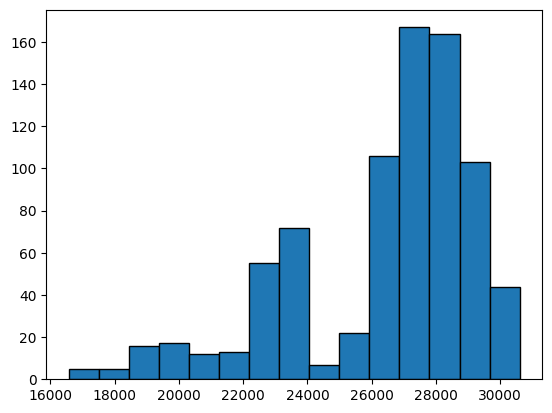

In [ ]:
# SepalLength列をndarrayに変換
nikkeiheikin_data1 = np.array(kansen_nikkeiheikin['始値'])

# ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(nikkeiheikin_data1, bins=15, histtype='barstacked', ec='black')
plt.show()

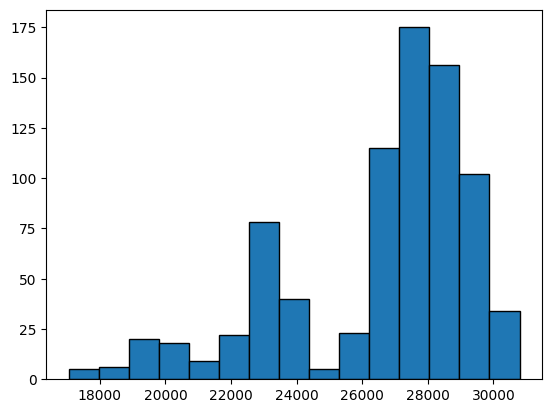

In [ ]:
# SepalLength列をndarrayに変換
nikkeiheikin_data3 = np.array(kansen_nikkeiheikin['高値'])

# ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(nikkeiheikin_data3, bins=15, histtype='barstacked', ec='black')
plt.show()

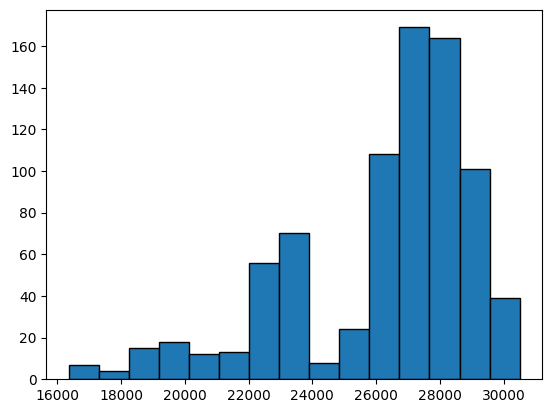

In [ ]:
# SepalLength列をndarrayに変換
nikkeiheikin_data2 = np.array(kansen_nikkeiheikin['安値'])

# ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(nikkeiheikin_data2, bins=15, histtype='barstacked', ec='black')
plt.show()

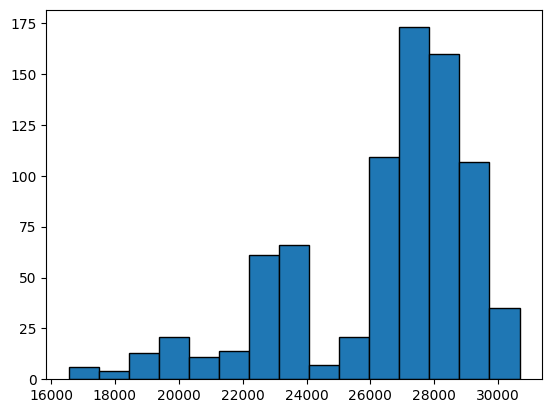

In [ ]:
# SepalLength列をndarrayに変換
nikkeiheikin_data4 = np.array(kansen_nikkeiheikin['終値'])

# ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(nikkeiheikin_data4, bins=15, histtype='barstacked', ec='black')
plt.show()

# nikkeiheikin5

In [ ]:
nikkeiheikin5 = kansen_nikkeiheikin[['始値','高値','安値','終値']] #'日付'

In [ ]:
nikkeiheikin5_na = nikkeiheikin5.dropna()

In [ ]:
nikkeiheikin5_na

始値        高値        安値        終値
0     23960.20  23975.38  23905.38  23933.13
1     24103.45  24115.95  24013.75  24041.26
4     24080.68  24108.11  24061.67  24083.51
5     24072.81  24081.75  23843.48  23864.56
6     23835.49  24040.87  23831.10  24031.35
...        ...       ...       ...       ...
1197  28340.59  28459.73  28241.67  28457.68
1198  28705.91  28879.24  28499.51  28856.44
1201  29058.05  29145.89  29016.83  29123.18
1202  29278.80  29278.80  29083.13  29157.95
1208  29095.46  29144.12  28931.81  28949.88

[808 rows x 4 columns]

## 相関係数

相関係数ρ = E[(X - E(X))(Y - E(Y))] / (E[(X - E(X))^2]E[(Y - E(Y))^2])

In [ ]:
nikkeiheikin5.corr()

始値        高値        安値        終値
始値  1.000000  0.998876  0.998299  0.996983
高値  0.998876  1.000000  0.998284  0.998652
安値  0.998299  0.998284  1.000000  0.998874
終値  0.996983  0.998652  0.998874  1.000000

In [ ]:
nikkeiheikin5_na.corr()

始値        高値        安値        終値
始値  1.000000  0.998876  0.998299  0.996983
高値  0.998876  1.000000  0.998284  0.998652
安値  0.998299  0.998284  1.000000  0.998874
終値  0.996983  0.998652  0.998874  1.000000

In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = nikkeiheikin5_na.drop('始値', axis=1)
y = nikkeiheikin5_na['始値']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.999
決定係数(test):0.999

回帰係数
高値    0.952575
安値    0.777811
終値   -0.731133
dtype: float64
切片: 6.456


In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = nikkeiheikin5_na.drop('高値', axis=1)
y = nikkeiheikin5_na['高値']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.999
決定係数(test):0.999

回帰係数
始値    0.704791
安値   -0.440300
終値    0.733443
dtype: float64
切片: 128.173


In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = nikkeiheikin5_na.drop('安値', axis=1)
y = nikkeiheikin5_na['安値']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.999
決定係数(test):0.999

回帰係数
始値    0.715456
高値   -0.547390
終値    0.835157
dtype: float64
切片: -167.617


In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = nikkeiheikin5_na.drop('終値', axis=1)
y = nikkeiheikin5_na['終値']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.999
決定係数(test):0.999

回帰係数
始値   -0.625409
高値    0.847956
安値    0.776653
dtype: float64
切片: 24.821


In [ ]:
# まだよくわかっていない
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
#cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    nikkeiheikin5_na['高値'], nikkeiheikin5_na['安値'], stratify = nikkeiheikin5_na.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

AttributeError: 'DataFrame' object has no attribute 'target'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


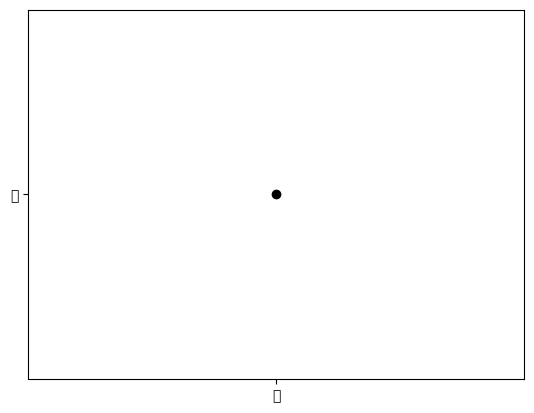

In [ ]:
# もっと後の章
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、一方は使用しない「 _ 」で受け取る
# X, _= make_blobs(random_state=10)
X, _, _, _ = nikkeiheikin5_na

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[0],X[1],color='black')
#plt.scatter(nikkeiheikin5_na[0],nikkeiheikin5_na[1],color='black')

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

ValueError: could not convert string to float: '始値'

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

NameError: name 'bank_sub_std' is not defined

In [ ]:
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [ ]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [ ]:
# concatでデータを横に結合(axis=1を指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2','cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)

In [ ]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)

In [ ]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [ ]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)

# 先頭の5行を表示
bank_with_cluster.head()

In [ ]:
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

In [ ]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

In [ ]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1),cmap='Reds')

In [ ]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [ ]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

In [ ]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

In [ ]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

In [ ]:
#　birth_year の上3つの数字・文字を取り出す
kansen_nikkeiheikin['yasune_list_2'] = yasune_list.map(lambda x: str(x)[0:2])
kansen_nikkeiheikin

AttributeError: 'list' object has no attribute 'map'

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(0)

scores = pd.Series(np.around(np.random.normal(65, 15, 200).clip(0, 100)))
print(scores)

In [ ]:
# SepalLength列をndarrayに変換
data = np.array(df['SepalLength'])

# ヒストグラム
hist, bin_edges = np.histogram(data, bins=10)

In [ ]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

In [ ]:
kansen_nikkeiheikin[kansen_nikkeiheikin['日付'] == '2020/12/31']

日付   始値   高値   安値   終値   ALL  Hokkaido  Aomori  Iwate  Miyagi  \
350  2020/12/31  NaN  NaN  NaN  NaN  4524       167      23      3      26   

     ...  Ehime  Kochi  Fukuoka  Saga  Nagasaki  Kumamoto  Oita  Miyazaki  \
350  ...      8      9      190     4        29        32    22        19   

     Kagoshima  Okinawa  
350         10       58  

[1 rows x 53 columns]

### 2020年

1/1 ~ 4/30

In [ ]:
# 2種類表示できない
#横軸（x軸）に日付を設定
X = kansen_nikkeiheikin.loc[:105,'日付']    #データ量が多いため700行目以降
# X_PCR_data = PCR_data.to_datetime(X)

#縦軸：PCR検査実施人数
# valueがfloatなのでstrかbyteに変換する

height1 = takane_list[:106]   #1/1 ~ 4/30
height2 = yasune_list[:106]

plt.figure(figsize=(20, 10))

width = 0.3 #棒グラフの幅
shift = width/2 #ずらす幅
#plt.bar(X, Y, align='center', width = 0.5)
# グラフの描画
p1 = plt.bar(X, height1, color = 'blue')
p2 = plt.bar(X, height2, color='lightblue') #  bottom = height1,

# 棒グラフそれぞれのラベル
#plt.xticks(X, [, 'B Class', 'C Class'])
plt.yticks( np.arange(10000, 25000, 100))

# xとyのラベルを設定
plt.xlabel('Date')
plt.ylabel('')
# グリッドを表示
#plt.grid(True)
#グラフ作図
# plt.plot(X_PCR_data, Y)
#plt.plot(X, Y)

# 凡例を表示
plt.legend((p1[0], p2[0]), ('takane', 'yasune'))
plt.show()

NameError: name 'kansen_nikkeiheikin' is not defined

5/1 ~ 8/31

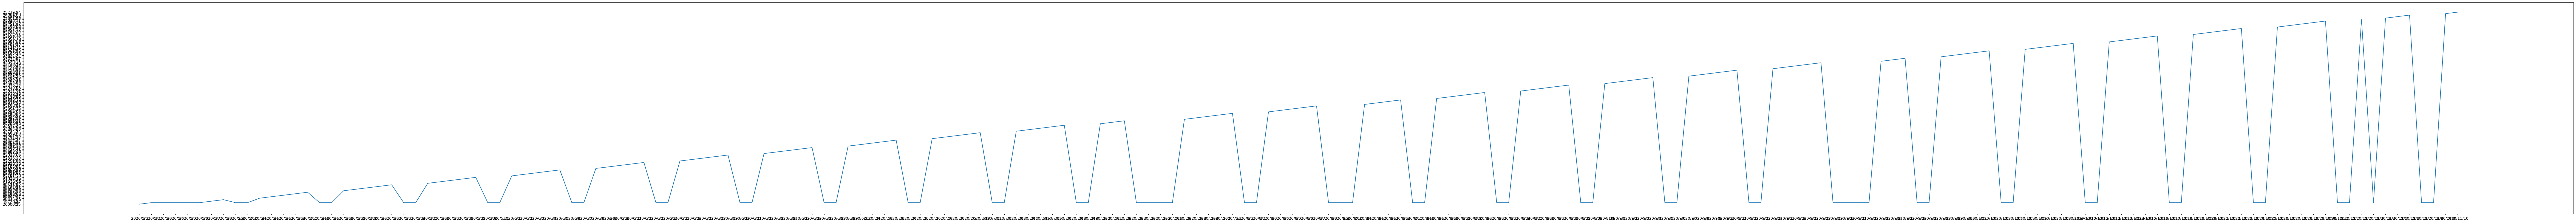

In [ ]:
# 106:300

# 2種類表示できない
#横軸（x軸）に日付を設定
X = kansen_nikkeiheikin.loc[:105,'日付']    #データ量が多いため700行目以降
# X_PCR_data = PCR_data.to_datetime(X)

#縦軸：PCR検査実施人数
# valueがfloatなのでstrかbyteに変換する

height1 = takane_list[106:300]   #1/1 ~ 4/30
height2 = yasune_list[106:300]

plt.figure(figsize=(20, 10))

width = 0.3 #棒グラフの幅
shift = width/2 #ずらす幅
#plt.bar(X, Y, align='center', width = 0.5)
# グラフの描画
p1 = plt.bar(X, height1, color = 'blue')
p2 = plt.bar(X, height2, color='lightblue') #  bottom = height1,

# 棒グラフそれぞれのラベル
#plt.xticks(X, [, 'B Class', 'C Class'])
plt.yticks( np.arange(10000, 25000, 100))

# xとyのラベルを設定
plt.xlabel('Date')
plt.ylabel('')
# グリッドを表示
#plt.grid(True)
#グラフ作図
# plt.plot(X_PCR_data, Y)
#plt.plot(X, Y)

# 凡例を表示
plt.legend((p1[0], p2[0]), ('takane', 'yasune'))
plt.show()

9/1 ~ 12/31

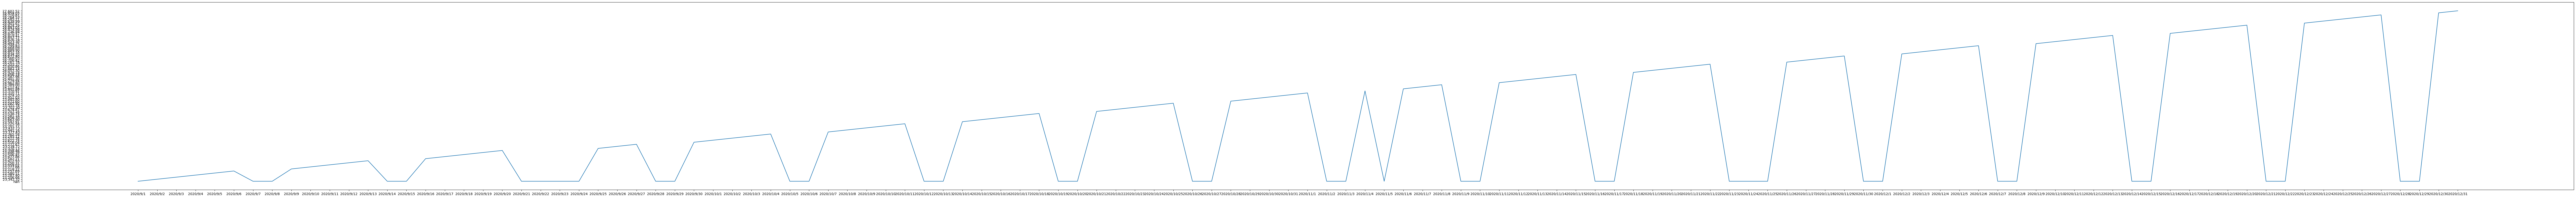

In [ ]:
#横軸（x軸）に日付を設定
X = kansen_nikkeiheikin.loc[229:350,'日付']    #データ量が多いため700行目以降
# X_PCR_data = PCR_data.to_datetime(X)

#縦軸：PCR検査実施人数
# valueがfloatなのでstrかbyteに変換する

Y = takane_list[227:349]   #5/1 ~ 8/31

plt.figure(figsize=(135, 10))
#グラフ作図
# plt.plot(X_PCR_data, Y)
plt.plot(X, Y)
plt.show()

In [ ]:
kansen_nikkeiheikin.iloc[229]

日付            2020/9/1
始値           23,089.63
高値           23,206.66
安値           23,047.77
終値           23,138.07
ALL                635
Hokkaido            16
Aomori               0
Iwate                3
Miyagi               3
Akita                0
Yamagata             0
Fukushima            6
Ibaraki              4
Tochigi              3
Gunma                5
Saitama             46
Chiba               18
Tokyo              170
Kanagawa            59
Niigata              1
Toyama               7
Ishikawa            27
Fukui                4
Yamanashi            0
Nagano               5
Gifu                 3
Shizuoka             2
Aichi               24
Mie                  0
Shiga                2
Kyoto               22
Osaka              114
Hyogo               21
Nara                 5
Wakayama             0
Tottori              0
Shimane              0
Okayama              0
Hiroshima            0
Yamaguchi            2
Tokushima            3
Kagawa               1
Ehime      

# ぺぺぺぺペペロンチーノ

# はいタッチーズケーキノー発酵

# nikkeiheikin_data 棒グラフ

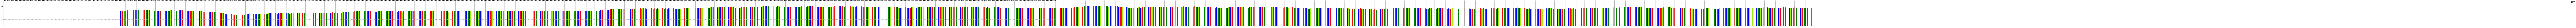

In [ ]:
# データの準備
y1 = nikkeiheikin_data['始値']
y2 = nikkeiheikin_data['高値']
y3 = nikkeiheikin_data['安値']
y4 = nikkeiheikin_data['終値']

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.2

# グラフの大きさ指定
plt.figure(figsize = (600, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='red', width = w, label = 'Math final', align = 'center')# x+wをxにしたら重なる
plt.bar(x + 2*w, y3, color = 'green', width = w, label = 'Math first', align = 'center')
plt.bar(x + 3*w, y4, color='#a0f010', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2)
plt.grid(True)

# nikkeiheikin_data 円グラフ なし

# nikkeiheikin_data 散布図

## インポート必須

In [ ]:
# 3ヶ月ごと
hajimene_202001_03 = nikkeiheikin_data.loc[:85,'始値']
takane_202001_03 = nikkeiheikin_data.loc[:85,'高値']
yasune_202001_03 = nikkeiheikin_data.loc[:85,'安値']
owarine_202001_03 = nikkeiheikin_data.loc[:85,'終値']
labels_202001_03 = nikkeiheikin_data.loc[:85, '日付']
covid19_event_202001_03 = covid19_events[:85]

hajimene_202004_06 = nikkeiheikin_data.loc[86:176,'始値']
takane_202004_06 = nikkeiheikin_data.loc[86:176,'高値']
yasune_202004_06 = nikkeiheikin_data.loc[86:176,'安値']
owarine_202004_06 = nikkeiheikin_data.loc[86:176,'終値']
labels_202004_06 = nikkeiheikin_data.loc[86:176, '日付']
covid19_event_202004_06 = covid19_events[86:176]

hajimene_202007_09 = nikkeiheikin_data.loc[177:268,'始値']
takane_202007_09 = nikkeiheikin_data.loc[177:268,'高値']
yasune_202007_09 = nikkeiheikin_data.loc[177:268,'安値']
owarine_202007_09 = nikkeiheikin_data.loc[177:268,'終値']
labels_202007_09 = nikkeiheikin_data.loc[177:268, '日付']
covid19_event_202007_09 = covid19_events[177:268]

hajimene_202010_12 = nikkeiheikin_data.loc[269:360,'始値']
takane_202010_12 = nikkeiheikin_data.loc[269:360,'高値']
yasune_202010_12 = nikkeiheikin_data.loc[269:360,'安値']
owarine_202010_12 = nikkeiheikin_data.loc[269:360,'終値']
labels_202010_12 = nikkeiheikin_data.loc[269:360, '日付']
covid19_event_202010_12 = covid19_events[269:360]

hajimene_202101_03 = nikkeiheikin_data.loc[361:450,'始値']
takane_202101_03 = nikkeiheikin_data.loc[361:450,'高値']
yasune_202101_03 = nikkeiheikin_data.loc[361:450,'安値']
owarine_202101_03 = nikkeiheikin_data.loc[361:450,'終値']
labels_202101_03 = nikkeiheikin_data.loc[361:450, '日付']
covid19_event_202101_03 = covid19_events[361:450]

hajimene_202104_06 = nikkeiheikin_data.loc[451:541,'始値']
takane_202104_06 = nikkeiheikin_data.loc[451:541,'高値']
yasune_202104_06 = nikkeiheikin_data.loc[451:541,'安値']
owarine_202104_06 = nikkeiheikin_data.loc[451:541,'終値']
labels_202104_06 = nikkeiheikin_data.loc[451:541, '日付']
covid19_event_202104_06 = covid19_events[451:541]

hajimene_202107_09 = nikkeiheikin_data.loc[542:633,'始値']
takane_202107_09 = nikkeiheikin_data.loc[542:633,'高値']
yasune_202107_09 = nikkeiheikin_data.loc[542:633,'安値']
owarine_202107_09 = nikkeiheikin_data.loc[542:633,'終値']
labels_202107_09 = nikkeiheikin_data.loc[542:633, '日付']
covid19_event_202107_09 = covid19_events[542:633]

hajimene_202110_12 = nikkeiheikin_data.loc[634:725,'始値']
takane_202110_12 = nikkeiheikin_data.loc[634:725,'高値']
yasune_202110_12 = nikkeiheikin_data.loc[634:725,'安値']
owarine_202110_12 = nikkeiheikin_data.loc[634:725,'終値']
labels_202110_12 = nikkeiheikin_data.loc[634:725, '日付']
covid19_event_202110_12 = covid19_events[634:725]

hajimene_202201_03 = nikkeiheikin_data.loc[726:815,'始値']
takane_202201_03 = nikkeiheikin_data.loc[726:815,'高値']
yasune_202201_03 = nikkeiheikin_data.loc[726:815,'安値']
owarine_202201_03 = nikkeiheikin_data.loc[726:815,'終値']
labels_202201_03 = nikkeiheikin_data.loc[726:815, '日付']
covid19_event_202201_03 = covid19_events[726:815]

hajimene_202204_06 = nikkeiheikin_data.loc[816:906,'始値']
takane_202204_06 = nikkeiheikin_data.loc[816:906,'高値']
yasune_202204_06 = nikkeiheikin_data.loc[816:906,'安値']
owarine_202204_06 = nikkeiheikin_data.loc[816:906,'終値']
labels_202204_06 = nikkeiheikin_data.loc[816:906, '日付']
covid19_event_202204_06 = covid19_events[816:906]

hajimene_202207_09 = nikkeiheikin_data.loc[907:998,'始値']
takane_202207_09 = nikkeiheikin_data.loc[907:998,'高値']
yasune_202207_09 = nikkeiheikin_data.loc[907:998,'安値']
owarine_202207_09 = nikkeiheikin_data.loc[907:998,'終値']
labels_202207_09 = nikkeiheikin_data.loc[907:998, '日付']
covid19_event_202207_09 = covid19_events[907:998]

hajimene_202210_12 = nikkeiheikin_data.loc[999:1090,'始値']
takane_202210_12 = nikkeiheikin_data.loc[999:1090,'高値']
yasune_202210_12 = nikkeiheikin_data.loc[999:1090,'安値']
owarine_202210_12 = nikkeiheikin_data.loc[999:1090,'終値']
labels_202210_12 = nikkeiheikin_data.loc[999:1090, '日付']
covid19_event_202210_12 = covid19_events[999:1090]

hajimene_202301_03 = nikkeiheikin_data.loc[1091:1180,'始値']
takane_202301_03 = nikkeiheikin_data.loc[1091:1180,'高値']
yasune_202301_03 = nikkeiheikin_data.loc[1091:1180,'安値']
owarine_202301_03 = nikkeiheikin_data.loc[1091:1180,'終値']
labels_202301_03 = nikkeiheikin_data.loc[1091:1180, '日付']
covid19_event_202301_03 = covid19_events[1091:1180]

hajimene_202304_06 = nikkeiheikin_data.loc[1181:1271,'始値']
takane_202304_06 = nikkeiheikin_data.loc[1181:1271,'高値']
yasune_202304_06 = nikkeiheikin_data.loc[1181:1271,'安値']
owarine_202304_06 = nikkeiheikin_data.loc[1181:1271,'終値']
labels_202304_06 = nikkeiheikin_data.loc[1181:1271, '日付']
covid19_event_202304_06 = covid19_events[1181:1271]

hajimene_202307_09 = nikkeiheikin_data.loc[1272:1363,'始値']
takane_202307_09 = nikkeiheikin_data.loc[1272:1363,'高値']
yasune_202307_09 = nikkeiheikin_data.loc[1272:1363,'安値']
owarine_202307_09 = nikkeiheikin_data.loc[1272:1363,'終値']
labels_202307_09 = nikkeiheikin_data.loc[1272:1363, '日付']
covid19_event_202307_09 = covid19_events[1272:1363]

hajimene_202310_12 = nikkeiheikin_data.loc[1364:1455,'始値']
takane_202310_12 = nikkeiheikin_data.loc[1364:1455,'高値']
yasune_202310_12 = nikkeiheikin_data.loc[1364:1455,'安値']
owarine_202310_12 = nikkeiheikin_data.loc[1364:1455,'終値']
labels_202310_12 = nikkeiheikin_data.loc[1364:1455, '日付']
covid19_event_202210_12 = covid19_events[1364:1455]

# 1ヶ月ごと
hajimene_202001 = nikkeiheikin_data.loc[:25,'始値']#1/6~1/31
takane_202001 = nikkeiheikin_data.loc[:25,'高値']
yasune_202001 = nikkeiheikin_data.loc[:25,'安値']
owarine_202001 = nikkeiheikin_data.loc[:25,'終値']
labels_202001 = nikkeiheikin_data.loc[:25, '日付']
covid19_event_202001 = covid19_events[:25]

hajimene_202002 = nikkeiheikin_data.loc[26:54,'始値']
takane_202002 = nikkeiheikin_data.loc[26:54,'高値']
yasune_202002 = nikkeiheikin_data.loc[26:54,'安値']
owarine_202002 = nikkeiheikin_data.loc[26:54,'終値']
labels_202002 = nikkeiheikin_data.loc[26:54, '日付']
covid19_event_202002 = covid19_events[26:54]

hajimene_202003 = nikkeiheikin_data.loc[55:85,'始値']
takane_202003 = nikkeiheikin_data.loc[55:85,'高値']
yasune_202003 = nikkeiheikin_data.loc[55:85,'安値']
owarine_202003 = nikkeiheikin_data.loc[55:85,'終値']
labels_202003 = nikkeiheikin_data.loc[55:85, '日付']
covid19_event_202003 = covid19_events[55:85]

hajimene_202004 = nikkeiheikin_data.loc[86:115,'始値']
takane_202004 = nikkeiheikin_data.loc[86:115,'高値']
yasune_202004 = nikkeiheikin_data.loc[86:115,'安値']
owarine_202004 = nikkeiheikin_data.loc[86:115,'終値']
labels_202004 = nikkeiheikin_data.loc[86:115, '日付']
covid19_event_202004 = covid19_events[86:115]

hajimene_202005 = nikkeiheikin_data.loc[116:146,'始値']
takane_202005 = nikkeiheikin_data.loc[116:146,'高値']
yasune_202005 = nikkeiheikin_data.loc[116:146,'安値']
owarine_202005 = nikkeiheikin_data.loc[116:146,'終値']
labels_202005 = nikkeiheikin_data.loc[116:146, '日付']
covid19_event_202005 = covid19_events[116:146]

hajimene_202006 = nikkeiheikin_data.loc[147:176,'始値']
takane_202006 = nikkeiheikin_data.loc[147:176,'高値']
yasune_202006 = nikkeiheikin_data.loc[147:176,'安値']
owarine_202006 = nikkeiheikin_data.loc[147:176,'終値']
labels_202006 = nikkeiheikin_data.loc[147:176, '日付']
covid19_event_202006 = covid19_events[147:176]

hajimene_202007 = nikkeiheikin_data.loc[177:207,'始値']
takane_202007 = nikkeiheikin_data.loc[177:207,'高値']
yasune_202007 = nikkeiheikin_data.loc[177:207,'安値']
owarine_202007 = nikkeiheikin_data.loc[177:207,'終値']
labels_202007 = nikkeiheikin_data.loc[177:207, '日付']
covid19_event_202007 = covid19_events[177:207]
# 2020/01 25, 02 54, 03 85, 04 115, 05 146, 06 176, 07 207, 08 238, 09 268, 10 299, 11 329, 12 360
hajimene_202008 = nikkeiheikin_data.loc[208:238,'始値']
takane_202008 = nikkeiheikin_data.loc[208:238,'高値']
yasune_202008 = nikkeiheikin_data.loc[208:238,'安値']
owarine_202008 = nikkeiheikin_data.loc[208:238,'終値']
labels_202008 = nikkeiheikin_data.loc[208:238, '日付']
covid19_event_202008 = covid19_events[208:238]

hajimene_202009 = nikkeiheikin_data.loc[239:268,'始値']
takane_202009 = nikkeiheikin_data.loc[239:268,'高値']
yasune_202009 = nikkeiheikin_data.loc[239:268,'安値']
owarine_202009 = nikkeiheikin_data.loc[239:268,'終値']
labels_202009 = nikkeiheikin_data.loc[239:268, '日付']
covid19_event_202009 = covid19_events[239:268]

hajimene_202010 = nikkeiheikin_data.loc[269:299,'始値']
takane_202010 = nikkeiheikin_data.loc[269:299,'高値']
yasune_202010 = nikkeiheikin_data.loc[269:299,'安値']
owarine_202010 = nikkeiheikin_data.loc[269:299,'終値']
labels_202010 = nikkeiheikin_data.loc[269:299, '日付']
covid19_event_202010 = covid19_events[269:299]

hajimene_202011 = nikkeiheikin_data.loc[300:329,'始値']
takane_202011 = nikkeiheikin_data.loc[300:329,'高値']
yasune_202011 = nikkeiheikin_data.loc[300:329,'安値']
owarine_202011 = nikkeiheikin_data.loc[300:329,'終値']
labels_202011 = nikkeiheikin_data.loc[300:329, '日付']
covid19_event_202011 = covid19_events[300:329]

hajimene_202012 = nikkeiheikin_data.loc[330:360,'始値']
takane_202012 = nikkeiheikin_data.loc[330:360,'高値']
yasune_202012 = nikkeiheikin_data.loc[330:360,'安値']
owarine_202012 = nikkeiheikin_data.loc[330:360,'終値']
labels_202012 = nikkeiheikin_data.loc[330:360, '日付']
covid19_event_202012 = covid19_events[330:360]

hajimene_202101 = nikkeiheikin_data.loc[361:391,'始値']
takane_202101 = nikkeiheikin_data.loc[361:391,'高値']
yasune_202101 = nikkeiheikin_data.loc[361:391,'安値']
owarine_202101 = nikkeiheikin_data.loc[361:391,'終値']
labels_202101 = nikkeiheikin_data.loc[361:391, '日付']
covid19_event_202101 = covid19_events[361:391]

hajimene_202102 = nikkeiheikin_data.loc[392:419,'始値']
takane_202102 = nikkeiheikin_data.loc[392:419,'高値']
yasune_202102 = nikkeiheikin_data.loc[392:419,'安値']
owarine_202102 = nikkeiheikin_data.loc[392:419,'終値']
labels_202102 = nikkeiheikin_data.loc[392:419, '日付']
covid19_event_202102 = covid19_events[392:419]

hajimene_202103 = nikkeiheikin_data.loc[420:450,'始値']
takane_202103 = nikkeiheikin_data.loc[420:450,'高値']
yasune_202103 = nikkeiheikin_data.loc[420:450,'安値']
owarine_202103 = nikkeiheikin_data.loc[420:450,'終値']
labels_202103 = nikkeiheikin_data.loc[420:450, '日付']
covid19_event_202103 = covid19_events[420:450]

hajimene_202104 = nikkeiheikin_data.loc[451:480,'始値']
takane_202104 = nikkeiheikin_data.loc[451:480,'高値']
yasune_202104 = nikkeiheikin_data.loc[451:480,'安値']
owarine_202104 = nikkeiheikin_data.loc[451:480,'終値']
labels_202104 = nikkeiheikin_data.loc[451:480, '日付']
covid19_event_202104 = covid19_events[451:480]

hajimene_202105 = nikkeiheikin_data.loc[481:511,'始値']
takane_202105 = nikkeiheikin_data.loc[481:511,'高値']
yasune_202105 = nikkeiheikin_data.loc[481:511,'安値']
owarine_202105 = nikkeiheikin_data.loc[481:511,'終値']
labels_202105 = nikkeiheikin_data.loc[481:511, '日付']
covid19_event_202105 = covid19_events[481:511]

hajimene_202106 = nikkeiheikin_data.loc[512:541,'始値']
takane_202106 = nikkeiheikin_data.loc[512:541,'高値']
yasune_202106 = nikkeiheikin_data.loc[512:541,'安値']
owarine_202106 = nikkeiheikin_data.loc[512:541,'終値']
labels_202106 = nikkeiheikin_data.loc[512:541, '日付']
covid19_event_202106 = covid19_events[512:541]

hajimene_202107 = nikkeiheikin_data.loc[542:572,'始値']
takane_202107 = nikkeiheikin_data.loc[542:572,'高値']
yasune_202107 = nikkeiheikin_data.loc[542:572,'安値']
owarine_202107 = nikkeiheikin_data.loc[542:572,'終値']
labels_202107 = nikkeiheikin_data.loc[542:572, '日付']
covid19_event_202107 = covid19_events[542:572]

hajimene_202108 = nikkeiheikin_data.loc[573:603,'始値']
takane_202108 = nikkeiheikin_data.loc[573:603,'高値']
yasune_202108 = nikkeiheikin_data.loc[573:603,'安値']
owarine_202108 = nikkeiheikin_data.loc[573:603,'終値']
labels_202108 = nikkeiheikin_data.loc[573:603, '日付']
covid19_event_202108 = covid19_events[573:603]

hajimene_202109 = nikkeiheikin_data.loc[604:633,'始値']
takane_202109 = nikkeiheikin_data.loc[604:633,'高値']
yasune_202109 = nikkeiheikin_data.loc[604:633,'安値']
owarine_202109 = nikkeiheikin_data.loc[604:633,'終値']
labels_202109 = nikkeiheikin_data.loc[604:633, '日付']
covid19_event_202109 = covid19_events[604:633]

hajimene_202110 = nikkeiheikin_data.loc[634:664,'始値']
takane_202110 = nikkeiheikin_data.loc[634:664,'高値']
yasune_202110 = nikkeiheikin_data.loc[634:664,'安値']
owarine_202110 = nikkeiheikin_data.loc[634:664,'終値']
labels_202110 = nikkeiheikin_data.loc[634:664, '日付']
covid19_event_202110 = covid19_events[634:664]

hajimene_202111 = nikkeiheikin_data.loc[665:694,'始値']
takane_202111 = nikkeiheikin_data.loc[665:694,'高値']
yasune_202111 = nikkeiheikin_data.loc[665:694,'安値']
owarine_202111 = nikkeiheikin_data.loc[665:694,'終値']
labels_202111 = nikkeiheikin_data.loc[665:694, '日付']
covid19_event_202111 = covid19_events[665:694]

hajimene_202112 = nikkeiheikin_data.loc[695:725,'始値']
takane_202112 = nikkeiheikin_data.loc[695:725,'高値']
yasune_202112 = nikkeiheikin_data.loc[695:725,'安値']
owarine_202112 = nikkeiheikin_data.loc[695:725,'終値']
labels_202112 = nikkeiheikin_data.loc[695:725, '日付']
covid19_event_202112 = covid19_events[695:725]

hajimene_202201 = nikkeiheikin_data.loc[726:756,'始値']
takane_202201 = nikkeiheikin_data.loc[726:756,'高値']
yasune_202201 = nikkeiheikin_data.loc[726:756,'安値']
owarine_202201 = nikkeiheikin_data.loc[726:756,'終値']
labels_202201 = nikkeiheikin_data.loc[726:756, '日付']
covid19_event_202201 = covid19_events[726:756]

hajimene_202202 = nikkeiheikin_data.loc[757:784,'始値']
takane_202202 = nikkeiheikin_data.loc[757:784,'高値']
yasune_202202 = nikkeiheikin_data.loc[757:784,'安値']
owarine_202202 = nikkeiheikin_data.loc[757:784,'終値']
labels_202202 = nikkeiheikin_data.loc[757:784, '日付']
covid19_event_202202 = covid19_events[757:784]

hajimene_202203 = nikkeiheikin_data.loc[785:815,'始値']
takane_202203 = nikkeiheikin_data.loc[785:815,'高値']
yasune_202203 = nikkeiheikin_data.loc[785:815,'安値']
owarine_202203 = nikkeiheikin_data.loc[785:815,'終値']
labels_202203 = nikkeiheikin_data.loc[785:815, '日付']
covid19_event_202203 = covid19_events[785:815]

hajimene_202204 = nikkeiheikin_data.loc[816:845,'始値']
takane_202204 = nikkeiheikin_data.loc[816:845,'高値']
yasune_202204 = nikkeiheikin_data.loc[816:845,'安値']
owarine_202204 = nikkeiheikin_data.loc[816:845,'終値']
labels_202204 = nikkeiheikin_data.loc[816:845, '日付']
covid19_event_202204 = covid19_events[816:845]

hajimene_202205 = nikkeiheikin_data.loc[846:876,'始値']
takane_202205 = nikkeiheikin_data.loc[846:876,'高値']
yasune_202205 = nikkeiheikin_data.loc[846:876,'安値']
owarine_202205 = nikkeiheikin_data.loc[846:876,'終値']
labels_202205 = nikkeiheikin_data.loc[846:876, '日付']
covid19_event_202205 = covid19_events[846:876]

hajimene_202206 = nikkeiheikin_data.loc[877:906,'始値']
takane_202206 = nikkeiheikin_data.loc[877:906,'高値']
yasune_202206 = nikkeiheikin_data.loc[877:906,'安値']
owarine_202206 = nikkeiheikin_data.loc[877:906,'終値']
labels_202206 = nikkeiheikin_data.loc[877:906, '日付']
covid19_event_202206 = covid19_events[877:906]

hajimene_202207 = nikkeiheikin_data.loc[907:937,'始値']
takane_202207 = nikkeiheikin_data.loc[907:937,'高値']
yasune_202207 = nikkeiheikin_data.loc[907:937,'安値']
owarine_202207 = nikkeiheikin_data.loc[907:937,'終値']
labels_202207 = nikkeiheikin_data.loc[907:937, '日付']
covid19_event_202207 = covid19_events[907:937]

hajimene_202208 = nikkeiheikin_data.loc[938:968,'始値']
takane_202208 = nikkeiheikin_data.loc[938:968,'高値']
yasune_202208 = nikkeiheikin_data.loc[938:968,'安値']
owarine_202208 = nikkeiheikin_data.loc[938:968,'終値']
labels_202208 = nikkeiheikin_data.loc[938:968, '日付']
covid19_event_202208 = covid19_events[938:968]

hajimene_202209 = nikkeiheikin_data.loc[969:998,'始値']
takane_202209 = nikkeiheikin_data.loc[969:998,'高値']
yasune_202209 = nikkeiheikin_data.loc[969:998,'安値']
owarine_202209 = nikkeiheikin_data.loc[969:998,'終値']
labels_202209 = nikkeiheikin_data.loc[969:998, '日付']
covid19_event_202209 = covid19_events[969:998]

hajimene_202210 = nikkeiheikin_data.loc[999:1029,'始値']
takane_202210 = nikkeiheikin_data.loc[999:1029,'高値']
yasune_202210 = nikkeiheikin_data.loc[999:1029,'安値']
owarine_202210 = nikkeiheikin_data.loc[999:1029,'終値']
labels_202210 = nikkeiheikin_data.loc[999:1029, '日付']
covid19_event_202210 = covid19_events[999:1029]

hajimene_202211 = nikkeiheikin_data.loc[1030:1059,'始値']
takane_202211 = nikkeiheikin_data.loc[1030:1059,'高値']
yasune_202211 = nikkeiheikin_data.loc[1030:1059,'安値']
owarine_202211 = nikkeiheikin_data.loc[1030:1059,'終値']
labels_202211 = nikkeiheikin_data.loc[1030:1059, '日付']
covid19_event_202211 = covid19_events[1030:1059]

hajimene_202212 = nikkeiheikin_data.loc[1060:1090,'始値']
takane_202212 = nikkeiheikin_data.loc[1060:1090,'高値']
yasune_202212 = nikkeiheikin_data.loc[1060:1090,'安値']
owarine_202212 = nikkeiheikin_data.loc[1060:1090,'終値']
labels_202212 = nikkeiheikin_data.loc[1060:1090,'日付']
covid19_event_202212 = covid19_events[1060:1090]

hajimene_202301 = nikkeiheikin_data.loc[1091:1121,'始値']
takane_202301 = nikkeiheikin_data.loc[1091:1121,'高値']
yasune_202301 = nikkeiheikin_data.loc[1091:1121,'安値']
owarine_202301 = nikkeiheikin_data.loc[1091:1121,'終値']
labels_202301 = nikkeiheikin_data.loc[1091:1121, '日付']
covid19_event_202301 = covid19_events[1091:1121]

hajimene_202302 = nikkeiheikin_data.loc[1122:1149,'始値']
takane_202302 = nikkeiheikin_data.loc[1122:1149,'高値']
yasune_202302 = nikkeiheikin_data.loc[1122:1149,'安値']
owarine_202302 = nikkeiheikin_data.loc[1122:1149,'終値']
labels_202302 = nikkeiheikin_data.loc[1122:1149, '日付']
covid19_event_202302 = covid19_events[1122:1149]

hajimene_202303 = nikkeiheikin_data.loc[1150:1180,'始値']
takane_202303 = nikkeiheikin_data.loc[1150:1180,'高値']
yasune_202303 = nikkeiheikin_data.loc[1150:1180,'安値']
owarine_202303 = nikkeiheikin_data.loc[1150:1180,'終値']
labels_202303 = nikkeiheikin_data.loc[1150:1180, '日付']
covid19_event_202303 = covid19_events[1150:1180]

hajimene_202304 = nikkeiheikin_data.loc[1181:1210,'始値']
takane_202304 = nikkeiheikin_data.loc[1181:1210,'高値']
yasune_202304 = nikkeiheikin_data.loc[1181:1210,'安値']
owarine_202304 = nikkeiheikin_data.loc[1181:1210,'終値']
labels_202304 = nikkeiheikin_data.loc[1181:1210, '日付']
covid19_event_202304 = covid19_events[1181:1210]

hajimene_202305 = nikkeiheikin_data.loc[1211:1241,'始値']
takane_202305 = nikkeiheikin_data.loc[1211:1241,'高値']
yasune_202305 = nikkeiheikin_data.loc[1211:1241,'安値']
owarine_202305 = nikkeiheikin_data.loc[1211:1241,'終値']
labels_202305 = nikkeiheikin_data.loc[1211:1241, '日付']
covid19_event_202305 = covid19_events[1211:1241]

hajimene_202306 = nikkeiheikin_data.loc[1242:1271,'始値']
takane_202306 = nikkeiheikin_data.loc[1242:1271,'高値']
yasune_202306 = nikkeiheikin_data.loc[1242:1271,'安値']
owarine_202306 = nikkeiheikin_data.loc[1242:1271,'終値']
labels_202306 = nikkeiheikin_data.loc[1242:1271, '日付']
covid19_event_202306 = covid19_events[1241:1271]

hajimene_202307 = nikkeiheikin_data.loc[1272:1302,'始値']
takane_202307 = nikkeiheikin_data.loc[1272:1302,'高値']
yasune_202307 = nikkeiheikin_data.loc[1272:1302,'安値']
owarine_202307 = nikkeiheikin_data.loc[1272:1302,'終値']
labels_202307 = nikkeiheikin_data.loc[1272:1302, '日付']
covid19_event_202307 = covid19_events[1272:1302]

hajimene_202308 = nikkeiheikin_data.loc[1303:1333,'始値']
takane_202308 = nikkeiheikin_data.loc[1303:1333,'高値']
yasune_202308 = nikkeiheikin_data.loc[1303:1333,'安値']
owarine_202308 = nikkeiheikin_data.loc[1303:1333,'終値']
labels_202308 = nikkeiheikin_data.loc[1303:1333, '日付']
covid19_event_202308 = covid19_events[1303:1333]

hajimene_202309 = nikkeiheikin_data.loc[1334:1363,'始値']
takane_202309 = nikkeiheikin_data.loc[1334:1363,'高値']
yasune_202309 = nikkeiheikin_data.loc[1334:1363,'安値']
owarine_202309 = nikkeiheikin_data.loc[1334:1363,'終値']
labels_202309 = nikkeiheikin_data.loc[1334:1363, '日付']
covid19_event_202309 = covid19_events[1334:1363]

hajimene_202310 = nikkeiheikin_data.loc[1364:1394,'始値']
takane_202310 = nikkeiheikin_data.loc[1364:1394,'高値']
yasune_202310 = nikkeiheikin_data.loc[1364:1394,'安値']
owarine_202310 = nikkeiheikin_data.loc[1364:1394,'終値']
labels_202310 = nikkeiheikin_data.loc[1364:1394, '日付']
covid19_event_202310 = covid19_events[1364:1394]

hajimene_202311 = nikkeiheikin_data.loc[1395:1424,'始値']
takane_202311 = nikkeiheikin_data.loc[1395:1424,'高値']
yasune_202311 = nikkeiheikin_data.loc[1395:1424,'安値']
owarine_202311 = nikkeiheikin_data.loc[1395:1424,'終値']
labels_202311 = nikkeiheikin_data.loc[1395:1424, '日付']
covid19_event_202311 = covid19_events[1395:1424]

hajimene_202312 = nikkeiheikin_data.loc[1425:1455,'始値']
takane_202312 = nikkeiheikin_data.loc[1425:1455,'高値']
yasune_202312 = nikkeiheikin_data.loc[1425:1455,'安値']
owarine_202312 = nikkeiheikin_data.loc[1425:1455,'終値']
labels_202312 = nikkeiheikin_data.loc[1425:1455, '日付']
covid19_event_202312 = covid19_events[1425:1455]

## 始値・高値

### 2020/01~03

TypeError: 'value' must be an instance of str or bytes, not a float

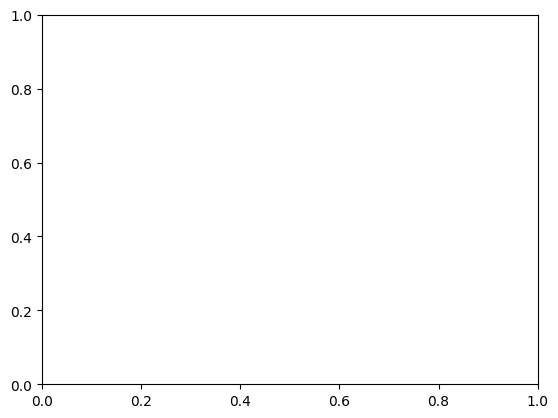

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202001_03
y=takane_202001_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

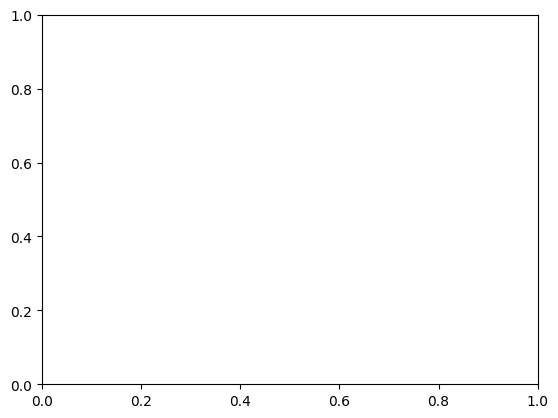

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202001_03
y=yasune_202001_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/04~06

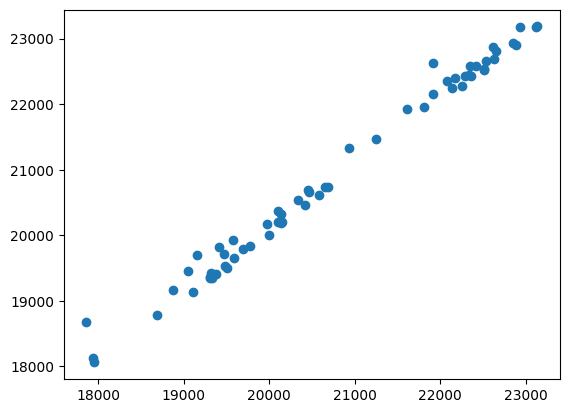

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202004_06
y=takane_202004_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/07~09

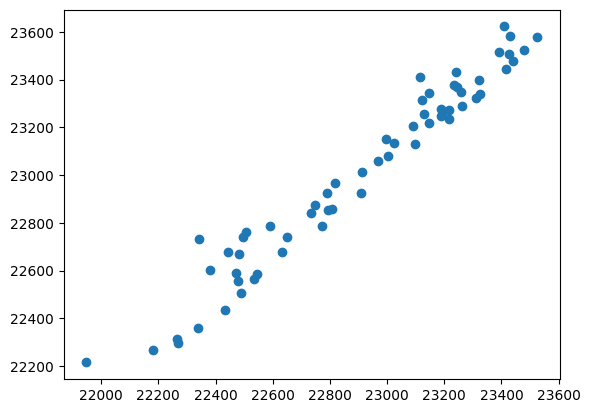

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202007_09
y=takane_202007_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/10~12

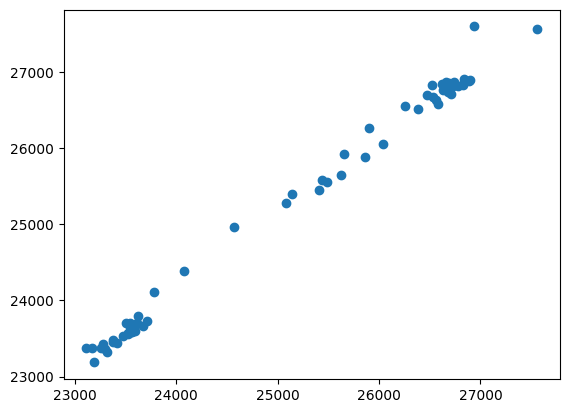

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202010_12
y=takane_202010_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

インポートする

### 2020

In [ ]:
print('------------------pink-------------------')
for i in range(len(covid19_event_202001_03)):
  if str(covid19_event_202001_03['出来事'][i]) != 'nan':
    print(covid19_event_202001_03['日付'][i])
    print(' ' + str(covid19_event_202001_03['出来事'][i]))

pink
2020/1/1
 中国に対して情報提供を求める
2020/1/3
 中国から武漢市のクラスターに関する情報提供
2020/1/5
 国際保健規則(International Health Regulations:IHR)に基づいて世界に公表
2020/1/9
 WHOは、中国より原因ウイルスは新たなコロナウイウスであるとの情報を受け取る
2020/1/11
 遺伝子配列の情報を受ける
2020/1/12
 遺伝子配列の情報を公表
2020/1/13
 タイで武漢旅行歴のある感染者を検知，中国外では第 1 例目となった.我が国では，このウイルス遺伝子情報が公開されたことによって，国立感染症研究所でPCR(polymerase chain reaction)検査法につきマニュアルを作成
2020/1/15
 日本における新型コロナウイルス感染症第1例目を確認
2020/1/16
 神奈川県内で国内第 1 例目となる武漢旅行歴のある感染者を発表した.
2020/1/19
 韓国第 1 例目
2020/1/21
 米国第 1 例目
2020/1/22
 緊急委員会会議
2020/1/23
 中国武漢では患者急増と医療崩壊から武漢市の封鎖を決定
2020/1/28
 我が国で，新型コロナウイルスにつ い て ， 感染症法に基づく「指定感染症」(二類相当)及び検疫法に基づく「検疫感染症」に指定し公布
2020/1/30
 緊急委員会会議。中国国内において症 例数が増加し，また，他国でもヒト―ヒト感染が確認されたことから，新型コロナウイルスによる感染症のアウトブレイクが，国際的に懸念される公衆衛生上の緊急事態(Public Health Emergency of International Concern: PHEIC)であると宣言された. 日本政府は，新型コロナウイルス感染症対策本部を設置した.
2020/2/1
 「検疫感染症」実施。北イタリア，韓国，イラン，スペインならびにニューヨー クを中心とした米国での患者急増に比して，日本国内での感染者発生状況は，2月1日で14~ 15 例目
2020/2/3
 横浜港に停泊して検疫が開始された
2020/2/4
 さっぽろ雪まつりに関連したクラスター発生
2020/2/5
 さっぽろ雪まつりに関連したクラスター発生
20

In [ ]:
covid19_event_202001_03

KeyError: '出来事'

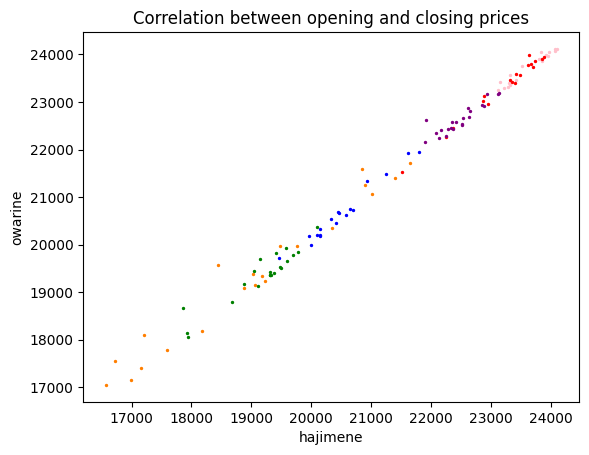

In [ ]:
plt.scatter(hajimene_202001, takane_202001, c="pink", s=2)
plt.scatter(hajimene_202002, takane_202002, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202003, takane_202003, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202004, takane_202004, c="green", s=2)
plt.scatter(hajimene_202005, takane_202005, c="blue", s=2)
plt.scatter(hajimene_202006, takane_202006, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

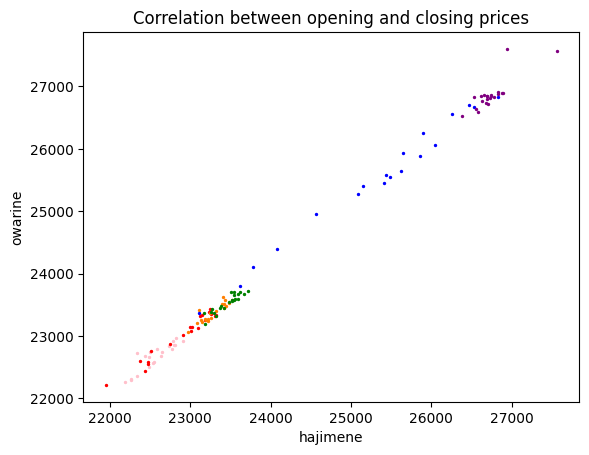

In [ ]:
plt.scatter(hajimene_202007, takane_202007, c="pink", s=2)
plt.scatter(hajimene_202008, takane_202008, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202009, takane_202009, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202010, takane_202010, c="green", s=2)
plt.scatter(hajimene_202011, takane_202011, c="blue", s=2)
plt.scatter(hajimene_202012, takane_202012, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2021/01~03

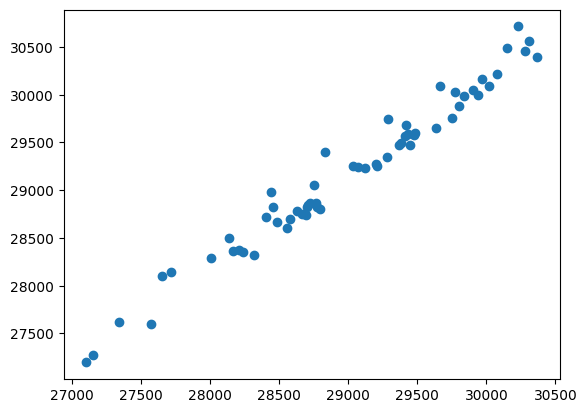

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202101_03
y=takane_202101_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/04~06

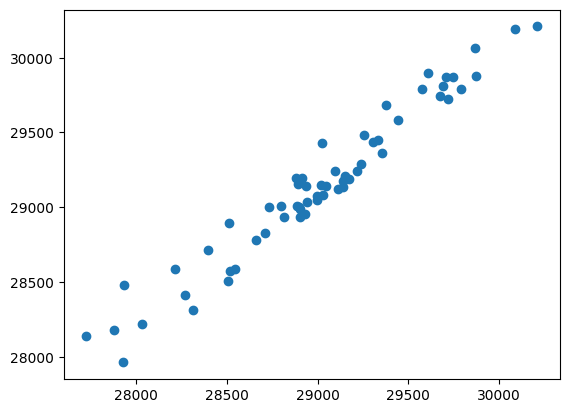

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202104_06
y=takane_202104_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/07~09

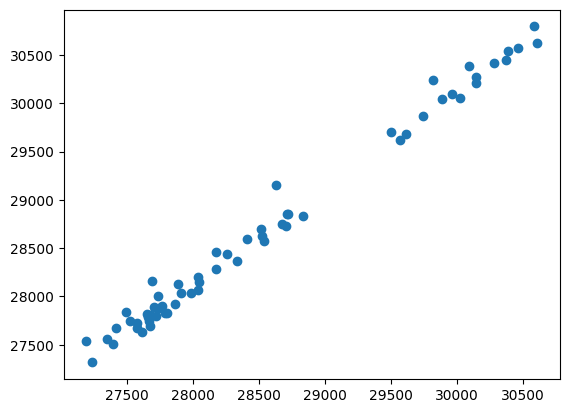

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202107_09
y=takane_202107_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/10~12

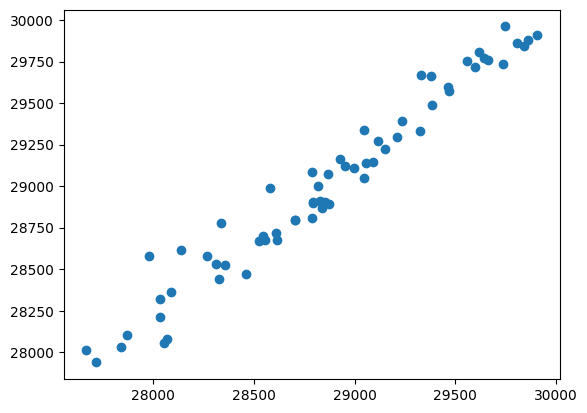

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202110_12
y=takane_202110_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

インポートする

### 2021

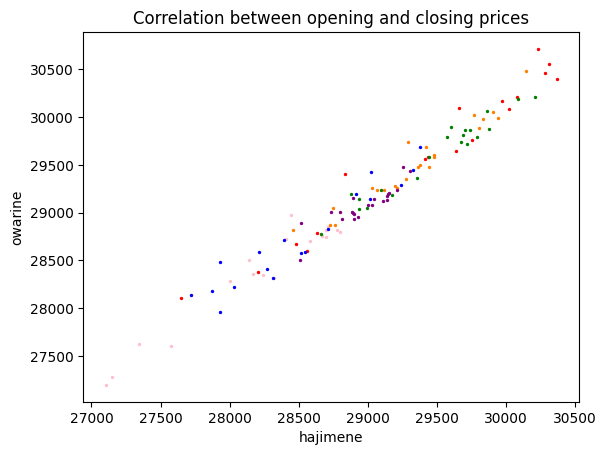

In [ ]:
plt.scatter(hajimene_202101, takane_202101, c="pink", s=2)
plt.scatter(hajimene_202102, takane_202102, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202103, takane_202103, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202104, takane_202104, c="green", s=2)
plt.scatter(hajimene_202105, takane_202105, c="blue", s=2)
plt.scatter(hajimene_202106, takane_202106, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

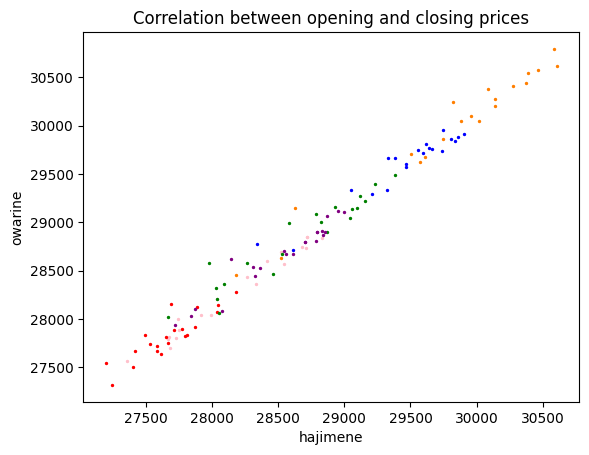

In [ ]:
plt.scatter(hajimene_202107, takane_202107, c="pink", s=2)
plt.scatter(hajimene_202108, takane_202108, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202109, takane_202109, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202110, takane_202110, c="green", s=2)
plt.scatter(hajimene_202111, takane_202111, c="blue", s=2)
plt.scatter(hajimene_202112, takane_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022/01~03

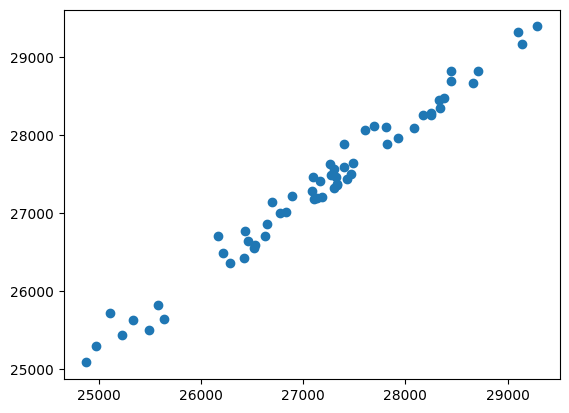

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202201_03
y=takane_202201_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/04~06

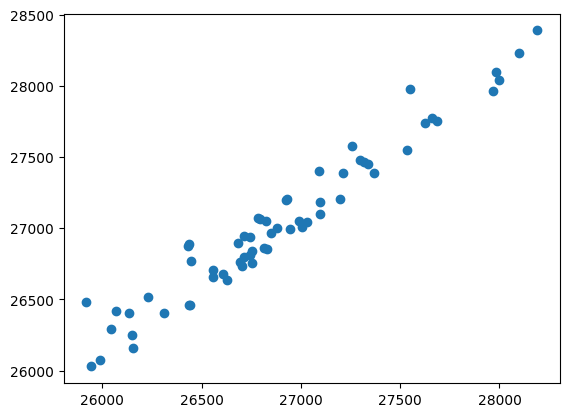

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202204_06
y=takane_202204_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/07~09

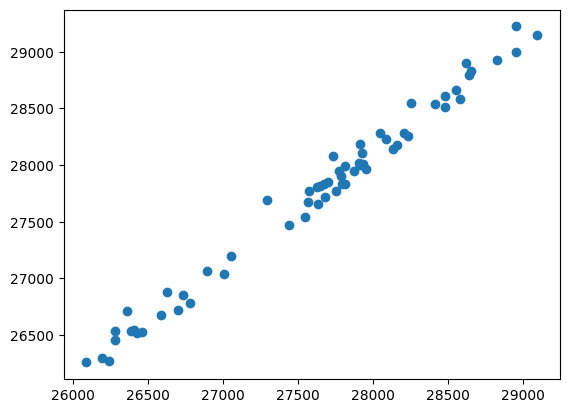

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202207_09
y=takane_202207_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/10~12

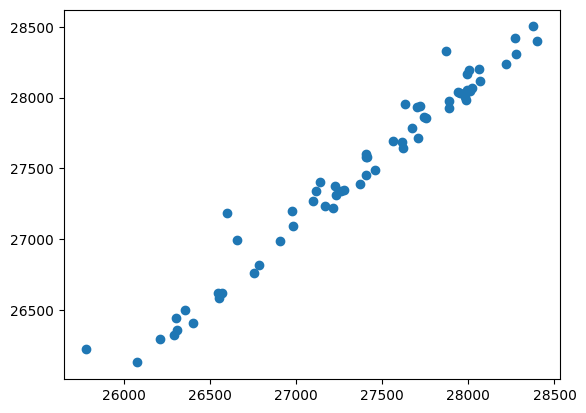

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202210_12
y=takane_202210_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022

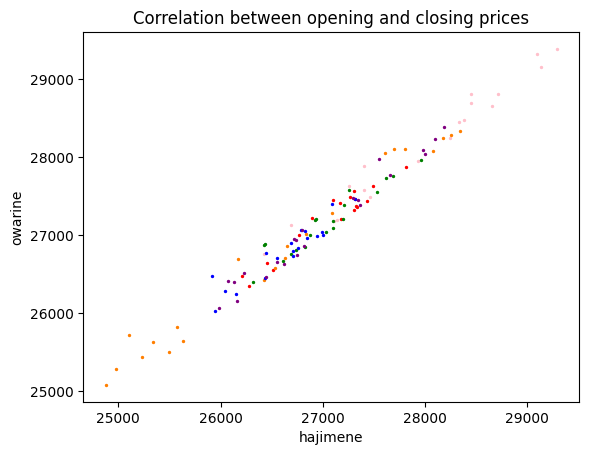

In [ ]:
plt.scatter(hajimene_202201, takane_202201, c="pink", s=2)
plt.scatter(hajimene_202202, takane_202202, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202203, takane_202203, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202204, takane_202204, c="green", s=2)
plt.scatter(hajimene_202205, takane_202205, c="blue", s=2)
plt.scatter(hajimene_202206, takane_202206, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

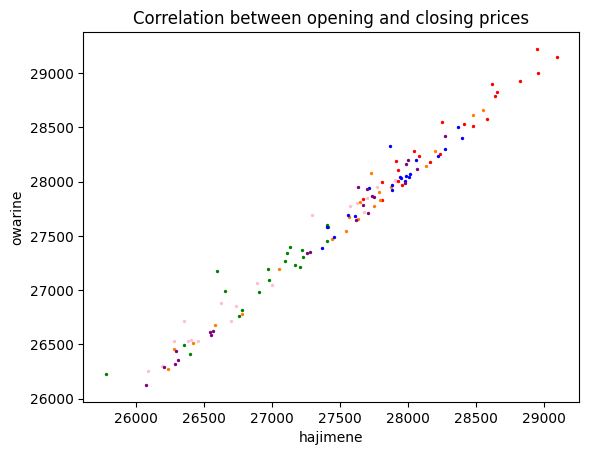

In [ ]:
plt.scatter(hajimene_202207, takane_202207, c="pink", s=2)
plt.scatter(hajimene_202208, takane_202208, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202209, takane_202209, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202210, takane_202210, c="green", s=2)
plt.scatter(hajimene_202211, takane_202211, c="blue", s=2)
plt.scatter(hajimene_202212, takane_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023/01~03

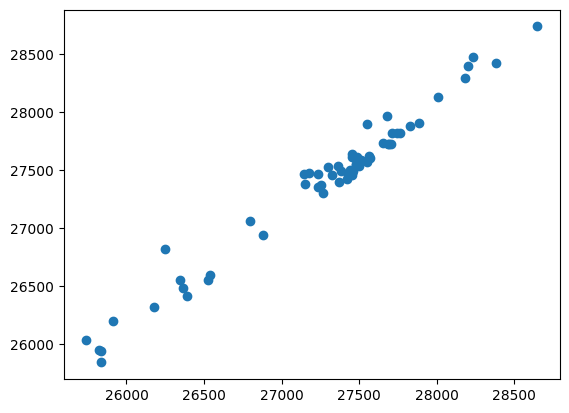

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202301_03
y=takane_202301_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/04~06

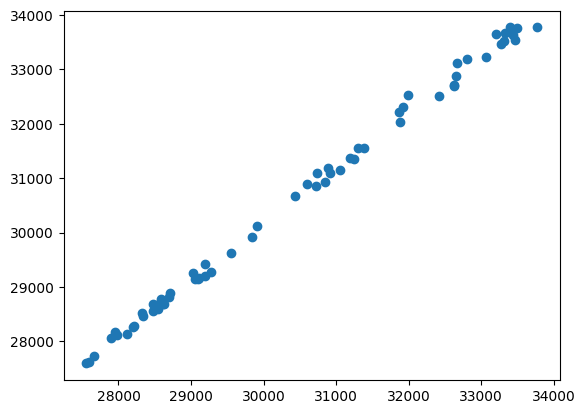

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202304_06
y=takane_202304_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/07~09

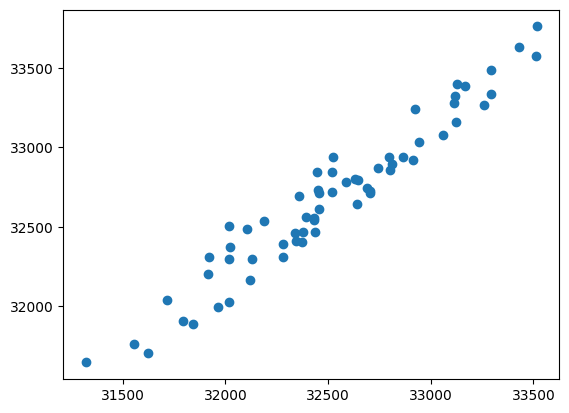

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202307_09
y=takane_202307_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/10~12

KeyError: 0

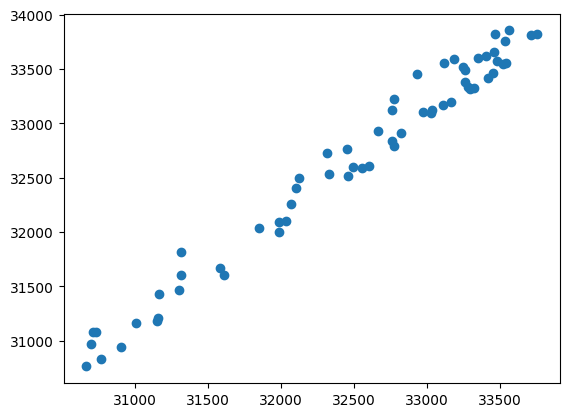

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202310_12
y=takane_202310_12

labels = [nikkeiheikin_data.loc[num, '日付'] for num in range(0,len(x))]

ax1.scatter(x,y) #散布図を描く

for i, label in enumerate(labels):
    plt.text(x[i], y[i],label)

plt.show()

### 2023

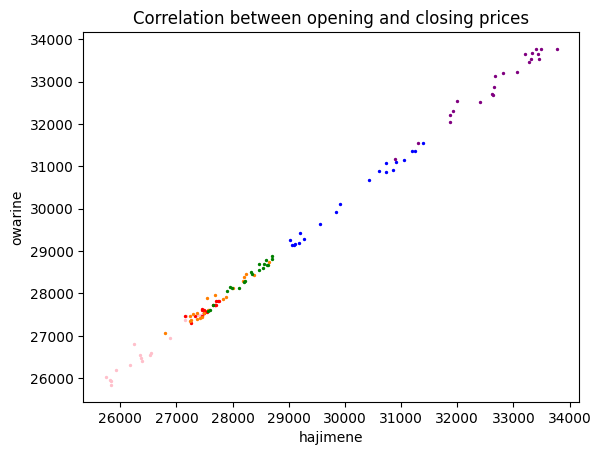

In [ ]:
plt.scatter(hajimene_202301, takane_202301, c="pink", s=2)
plt.scatter(hajimene_202302, takane_202302, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202303, takane_202303, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202304, takane_202304, c="green", s=2)
plt.scatter(hajimene_202305, takane_202305, c="blue", s=2)
plt.scatter(hajimene_202306, takane_202306, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

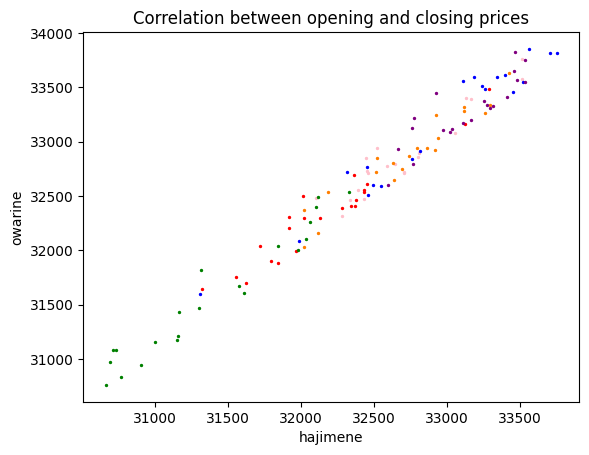

In [ ]:
plt.scatter(hajimene_202307, takane_202307, c="pink", s=2)
plt.scatter(hajimene_202308, takane_202308, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202309, takane_202309, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202310, takane_202310, c="green", s=2)
plt.scatter(hajimene_202311, takane_202311, c="blue", s=2)
plt.scatter(hajimene_202312, takane_202312, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

# a

ValueError: too many values to unpack (expected 2)

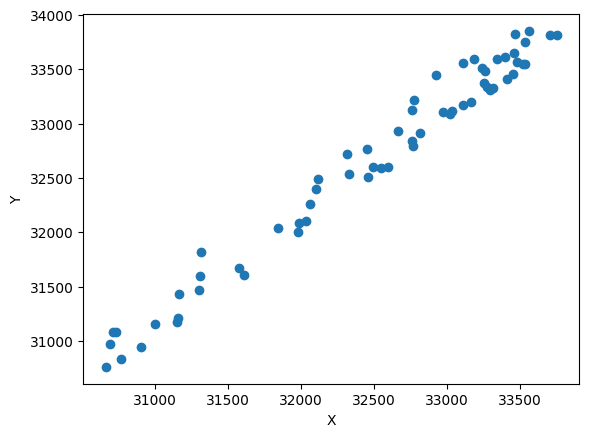

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x = hajimene_202310_12
y = takane_202310_12

labels = labels_202310_12

plt.xlabel('X')
plt.ylabel('Y')

ax1.scatter(x,y)

for i, label in labels:
    plt.text(x[i], y[i],label)

plt.show()

'2020/1/9'

In [ ]:
for num in range(0,len(x)):
  print(nikkeiheikin_data.loc[num, '日付'])

2020/1/6
2020/1/7
2020/1/8
2020/1/9
2020/1/10
2020/1/11
2020/1/12
2020/1/13
2020/1/14
2020/1/15
2020/1/16
2020/1/17
2020/1/18
2020/1/19
2020/1/20
2020/1/21
2020/1/22
2020/1/23
2020/1/24
2020/1/25
2020/1/26
2020/1/27
2020/1/28
2020/1/29
2020/1/30
2020/1/31
2020/2/1
2020/2/2
2020/2/3
2020/2/4
2020/2/5
2020/2/6
2020/2/7
2020/2/8
2020/2/9
2020/2/10
2020/2/11
2020/2/12
2020/2/13
2020/2/14
2020/2/15
2020/2/16
2020/2/17
2020/2/18
2020/2/19
2020/2/20
2020/2/21
2020/2/22
2020/2/23
2020/2/24
2020/2/25
2020/2/26
2020/2/27
2020/2/28
2020/2/29
2020/3/1
2020/3/2
2020/3/3
2020/3/4
2020/3/5
2020/3/6
2020/3/7
2020/3/8
2020/3/9
2020/3/10
2020/3/11
2020/3/12
2020/3/13
2020/3/14
2020/3/15
2020/3/16
2020/3/17
2020/3/18
2020/3/19
2020/3/20
2020/3/21
2020/3/22
2020/3/23
2020/3/24
2020/3/25
2020/3/26
2020/3/27
2020/3/28
2020/3/29
2020/3/30
2020/3/31
2020/4/1
2020/4/2
2020/4/3
2020/4/4
2020/4/5
2020/4/6
2020/4/7


In [ ]:
labels = labels_202310_12
for i, label in labels:
    plt.text(x[i], y[i],label)

ValueError: too many values to unpack (expected 2)

In [ ]:
nikkeiheikin_data.iloc[1364:1456]

日付        始値        高値        安値        終値
1364   2023/10/1       NaN       NaN       NaN       NaN
1365   2023/10/2  32101.97  32401.58  31759.88  31759.88
1366   2023/10/3  31607.97  31607.97  31157.40  31237.94
1367   2023/10/4  30765.03  30830.85  30487.67  30526.88
1368   2023/10/5  30733.65  31083.90  30565.32  31075.36
...          ...       ...       ...       ...       ...
1451  2023/12/27  33532.97  33755.75  33521.52  33681.24
1452  2023/12/28  33477.47  33571.73  33411.24  33539.62
1453  2023/12/29  33458.64  33652.71  33305.17  33464.17
1454  2023/12/30       NaN       NaN       NaN       NaN
1455  2023/12/31       NaN       NaN       NaN       NaN

[92 rows x 5 columns]

### 全体(2020-2023)

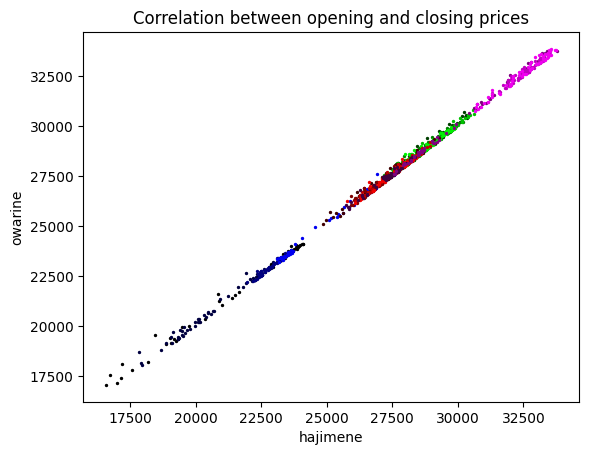

In [ ]:
plt.scatter(hajimene_202001_03, takane_202001_03, c="#000000", s=2)
plt.scatter(hajimene_202004_06, takane_202004_06, c="#000040", s=2)
plt.scatter(hajimene_202007_09, takane_202007_09, c="#000080", s=2)
plt.scatter(hajimene_202010_12, takane_202010_12, c="#0000f0", s=2)
plt.scatter(hajimene_202101_03, takane_202101_03, c="#004000", s=2)
plt.scatter(hajimene_202104_06, takane_202104_06, c="#008000", s=2)
plt.scatter(hajimene_202107_09, takane_202107_09, c="#00c000", s=2)
plt.scatter(hajimene_202110_12, takane_202110_12, c="#00f000", s=2)
plt.scatter(hajimene_202201_03, takane_202201_03, c="#400000", s=2)
plt.scatter(hajimene_202204_06, takane_202204_06, c="#800000", s=2)
plt.scatter(hajimene_202207_09, takane_202207_09, c="#c00000", s=2)
plt.scatter(hajimene_202210_12, takane_202210_12, c="#f00000", s=2)
plt.scatter(hajimene_202301_03, takane_202301_03, c="#400040", s=2)
plt.scatter(hajimene_202304_06, takane_202304_06, c="#800080", s=2)
plt.scatter(hajimene_202307_09, takane_202307_09, c="#c000c0", s=2)
plt.scatter(hajimene_202310_12, takane_202310_12, c="#f000f0", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

#### 感想

## 始値・安値

### 2020/01~03

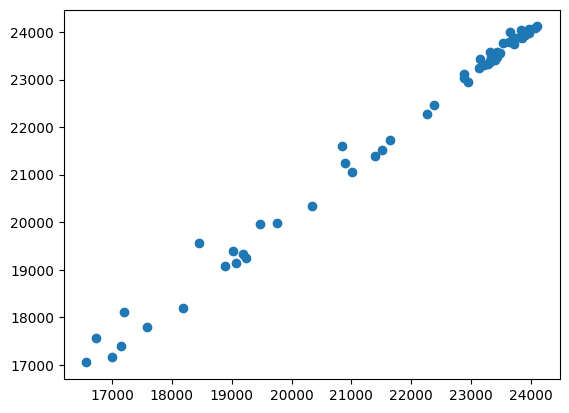

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202001_03
y=yasune_202001_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/04~06

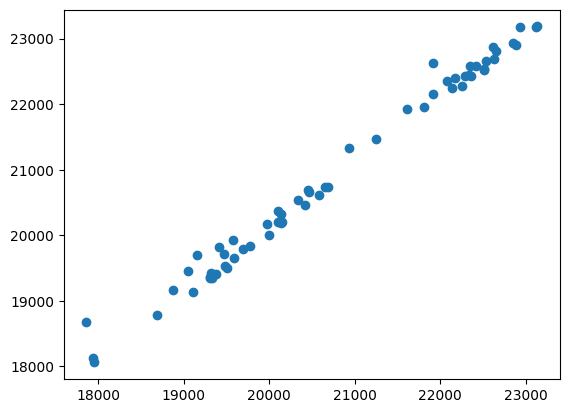

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202004_06
y=yasune_202004_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/07~09

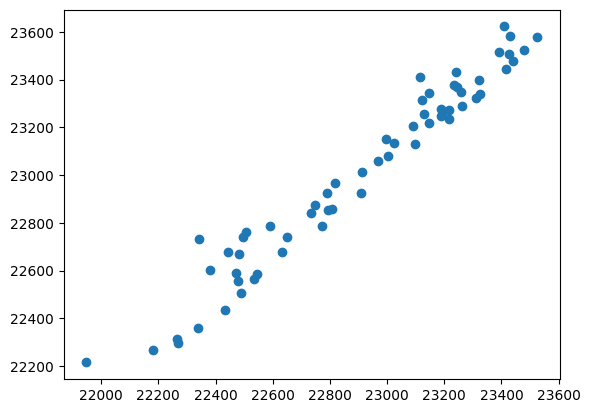

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202007_09
y=yasune_202007_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/10~12

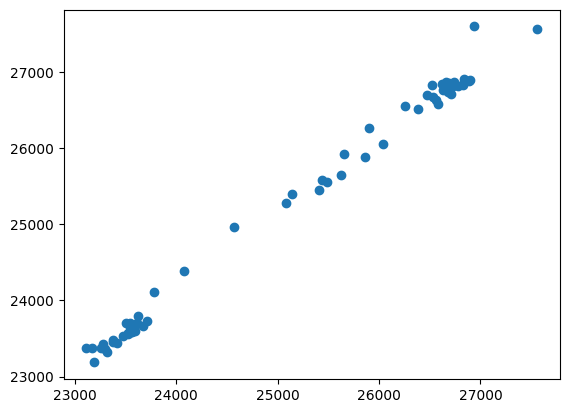

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202010_12
y=yasune_202010_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020

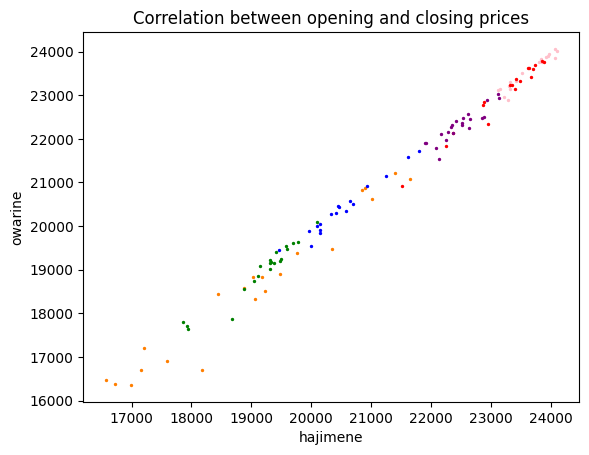

In [ ]:
plt.scatter(hajimene_202001, yasune_202001, c="pink", s=2)
plt.scatter(hajimene_202002, yasune_202002, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202003, yasune_202003, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202004, yasune_202004, c="green", s=2)
plt.scatter(hajimene_202005, yasune_202005, c="blue", s=2)
plt.scatter(hajimene_202006, yasune_202006, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

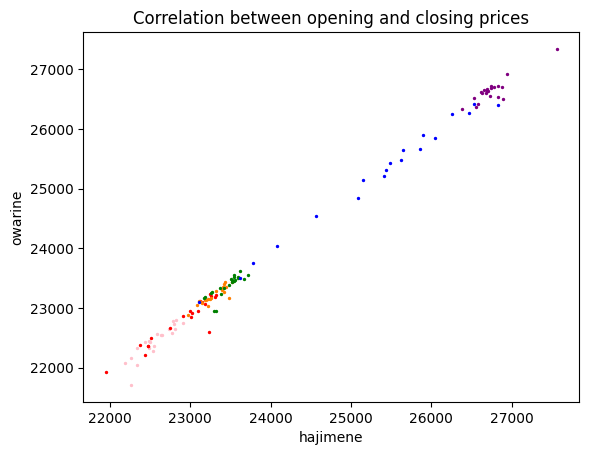

In [ ]:
plt.scatter(hajimene_202007, yasune_202007, c="pink", s=2)
plt.scatter(hajimene_202008, yasune_202008, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202009, yasune_202009, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202010, yasune_202010, c="green", s=2)
plt.scatter(hajimene_202011, yasune_202011, c="blue", s=2)
plt.scatter(hajimene_202012, yasune_202012, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2021/01~03

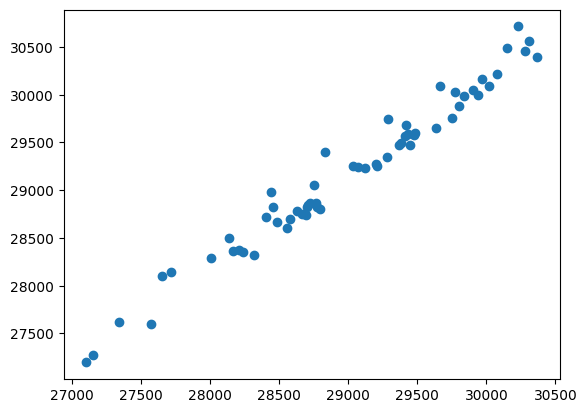

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202101_03
y=yasune_202101_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/04~06

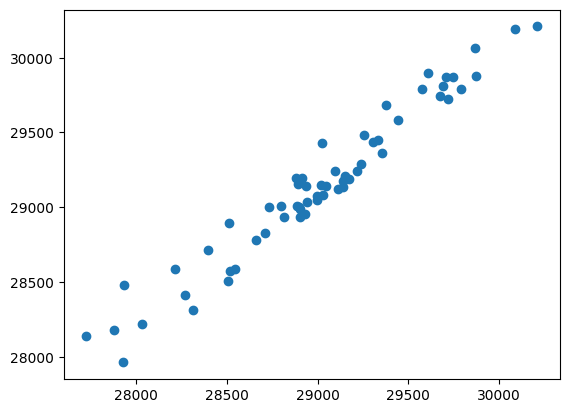

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202104_06
y=yasune_202104_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/07~09

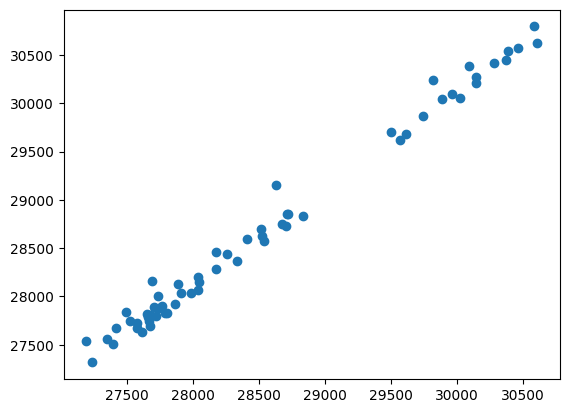

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202107_09
y=yasune_202107_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/10~12

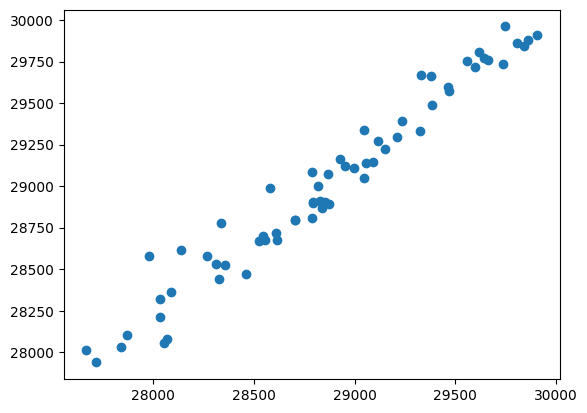

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202110_12
y=yasune_202110_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021

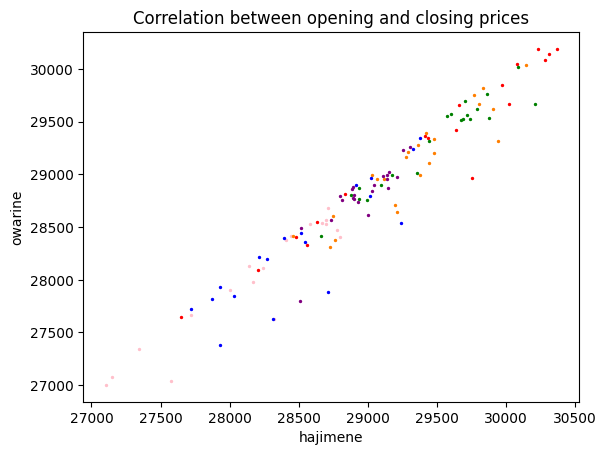

In [ ]:
plt.scatter(hajimene_202101, yasune_202101, c="pink", s=2)
plt.scatter(hajimene_202102, yasune_202102, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202103, yasune_202103, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202104, yasune_202104, c="green", s=2)
plt.scatter(hajimene_202105, yasune_202105, c="blue", s=2)
plt.scatter(hajimene_202106, yasune_202106, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

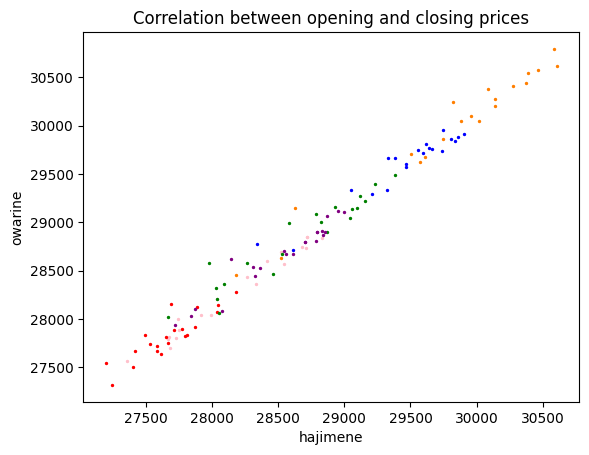

In [ ]:
plt.scatter(hajimene_202107, takane_202107, c="pink", s=2)
plt.scatter(hajimene_202108, takane_202108, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202109, takane_202109, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202110, takane_202110, c="green", s=2)
plt.scatter(hajimene_202111, takane_202111, c="blue", s=2)
plt.scatter(hajimene_202112, takane_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022/01~03

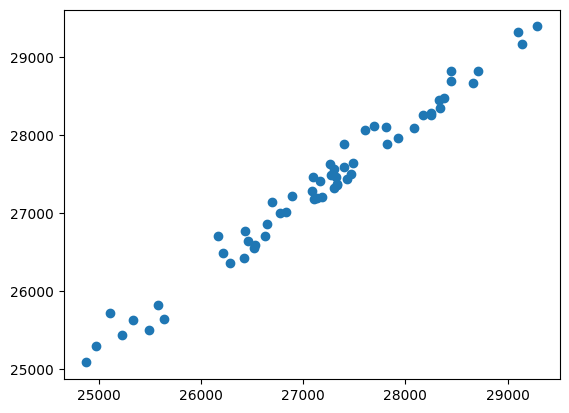

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202201_03
y=yasune_202201_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/04~06

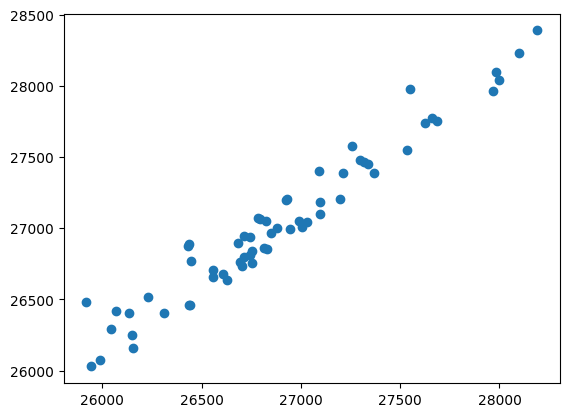

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202204_06
y=yasune_202204_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/07~09

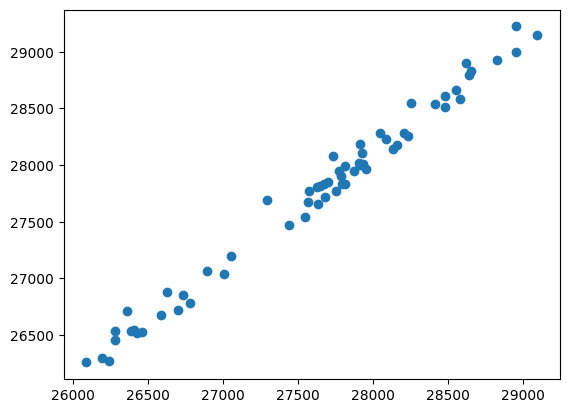

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202207_09
y=yasune_202207_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/10~12

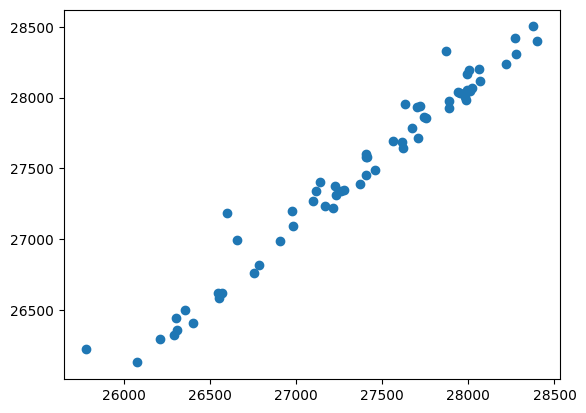

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202210_12
y=yasune_202210_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022

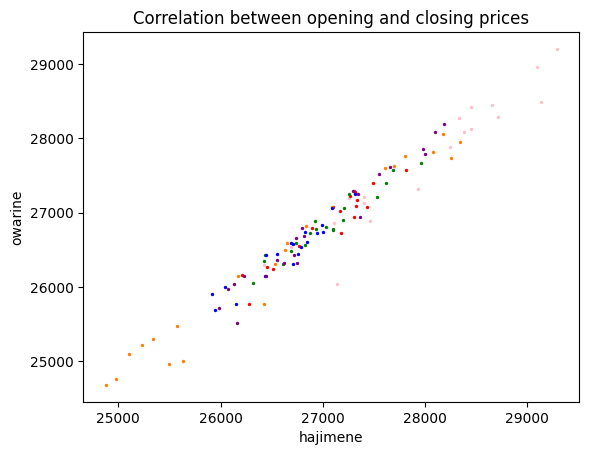

In [ ]:
plt.scatter(hajimene_202201, yasune_202201, c="pink", s=2)
plt.scatter(hajimene_202202, yasune_202202, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202203, yasune_202203, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202204, yasune_202204, c="green", s=2)
plt.scatter(hajimene_202205, yasune_202205, c="blue", s=2)
plt.scatter(hajimene_202206, yasune_202206, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

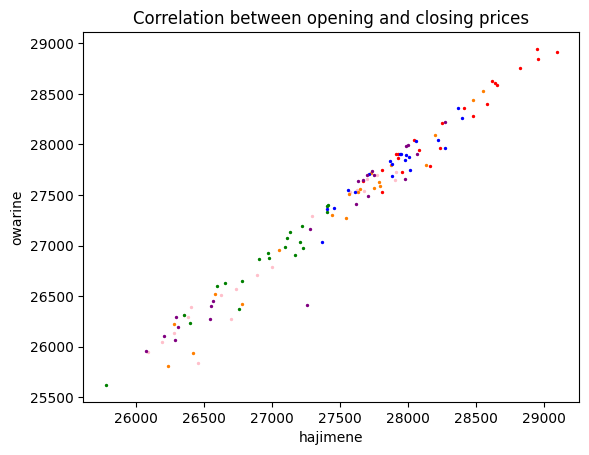

In [ ]:
plt.scatter(hajimene_202207, yasune_202207, c="pink", s=2)
plt.scatter(hajimene_202208, yasune_202208, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202209, yasune_202209, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202210, yasune_202210, c="green", s=2)
plt.scatter(hajimene_202211, yasune_202211, c="blue", s=2)
plt.scatter(hajimene_202212, yasune_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023/01~03

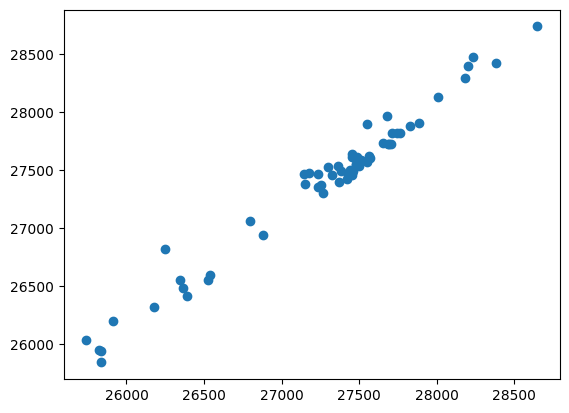

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202301_03
y=yasune_202301_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/04~06

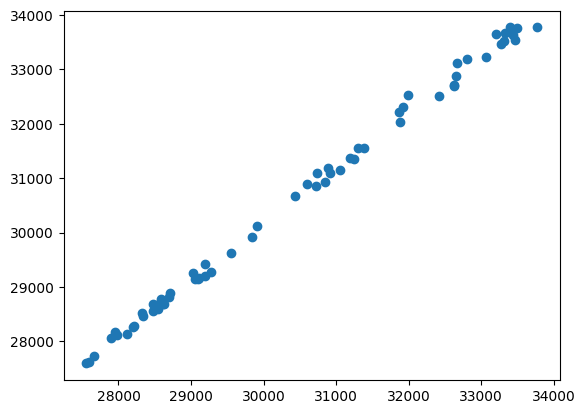

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202304_06
y=yasune_202304_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/07~09

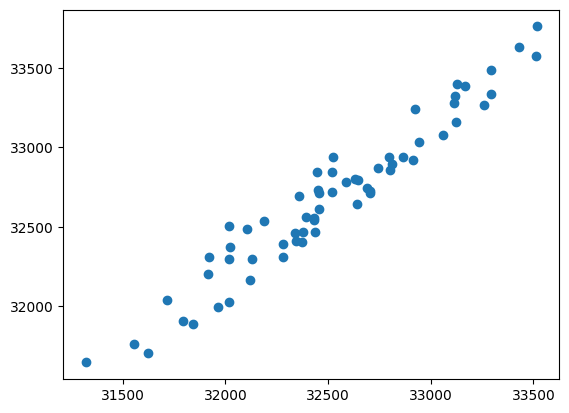

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202307_09
y=yasune_202307_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/10~12

KeyError: 0

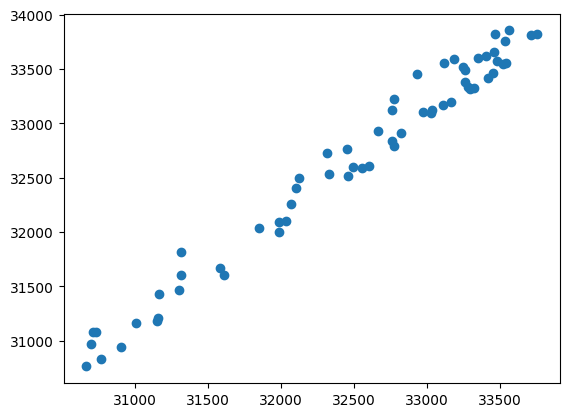

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202310_12
y=yasune_202310_12

labels = [nikkeiheikin_data.loc[num, '日付'] for num in range(0,len(x))]

ax1.scatter(x,y) #散布図を描く

for i, label in enumerate(labels):
    plt.text(x[i], y[i],label)

plt.show()

### 2023

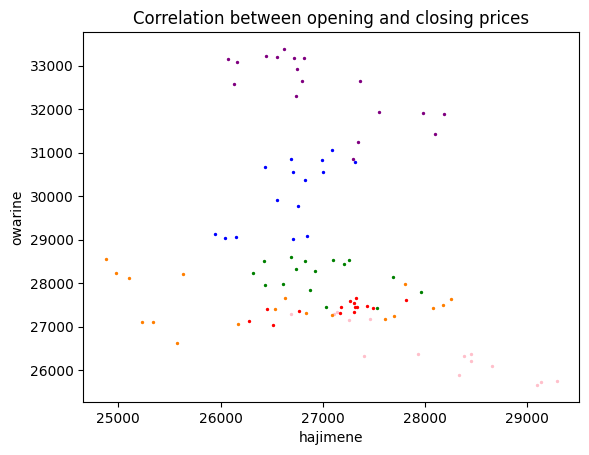

In [ ]:
plt.scatter(hajimene_202201, yasune_202301, c="pink", s=2)
plt.scatter(hajimene_202202, yasune_202302, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202203, yasune_202303, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202204, yasune_202304, c="green", s=2)
plt.scatter(hajimene_202205, yasune_202305, c="blue", s=2)
plt.scatter(hajimene_202206, yasune_202306, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

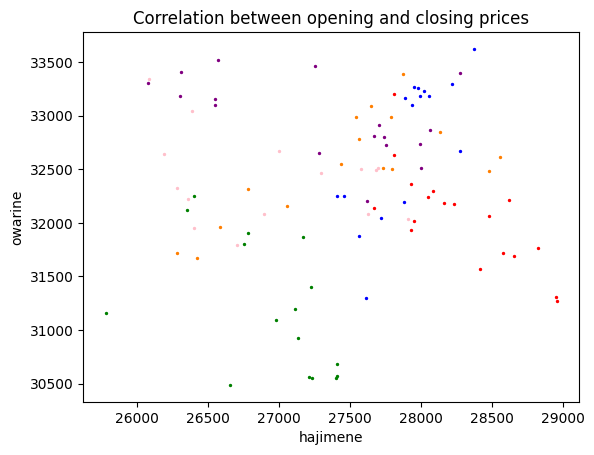

In [ ]:
plt.scatter(hajimene_202207, yasune_202307, c="pink", s=2)
plt.scatter(hajimene_202208, yasune_202308, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202209, yasune_202309, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202210, yasune_202310, c="green", s=2)
plt.scatter(hajimene_202211, yasune_202311, c="blue", s=2)
plt.scatter(hajimene_202212, yasune_202312, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

## 始値・終値

### 2020/01~03

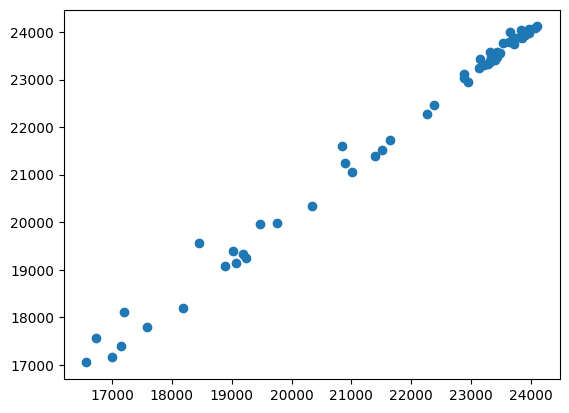

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202001_03
y=yasune_202001_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/04~06

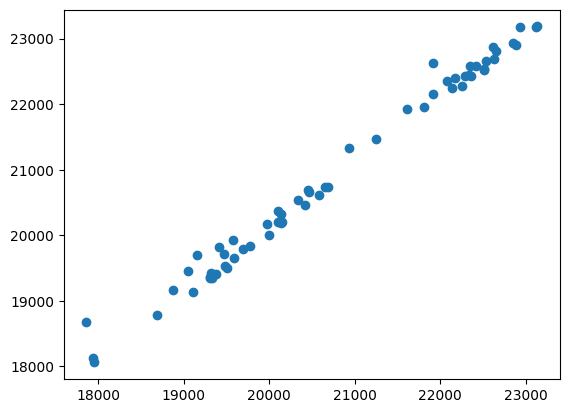

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202004_06
y=takane_202004_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/07~09

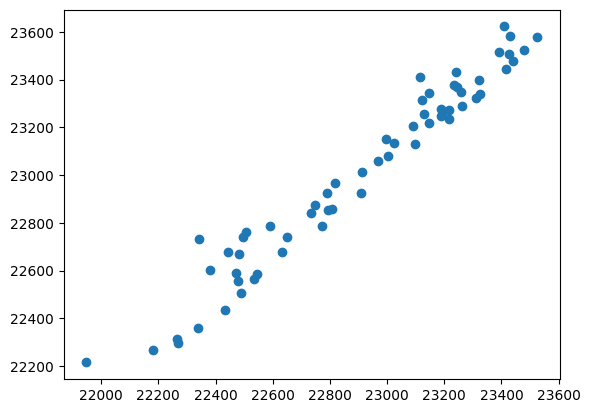

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202007_09
y=takane_202007_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020/10~12

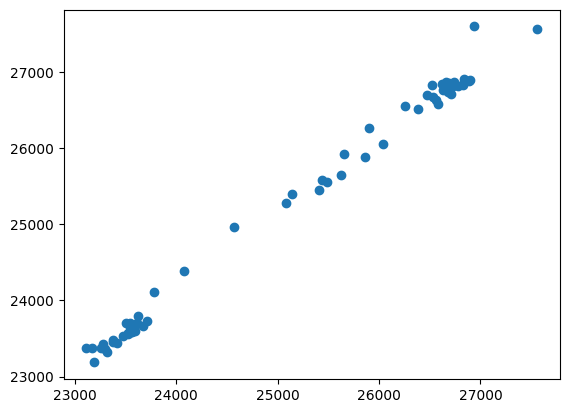

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202010_12
y=takane_202010_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2020

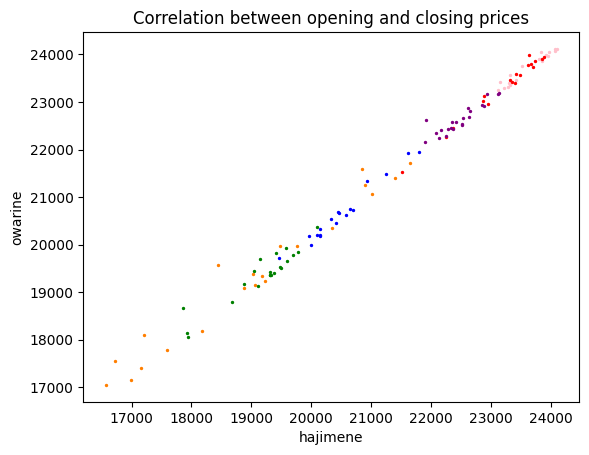

In [ ]:
plt.scatter(hajimene_202001, takane_202001, c="pink", s=2)
plt.scatter(hajimene_202002, takane_202002, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202003, takane_202003, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202004, takane_202004, c="green", s=2)
plt.scatter(hajimene_202005, takane_202005, c="blue", s=2)
plt.scatter(hajimene_202006, takane_202006, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

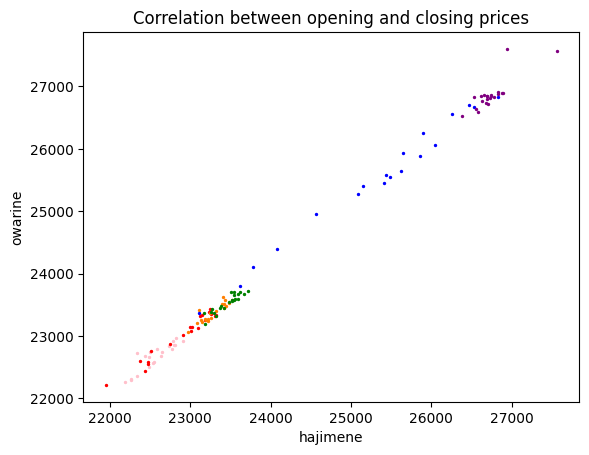

In [ ]:
plt.scatter(hajimene_202007, takane_202007, c="pink", s=2)
plt.scatter(hajimene_202008, takane_202008, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202009, takane_202009, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202010, takane_202010, c="green", s=2)
plt.scatter(hajimene_202011, takane_202011, c="blue", s=2)
plt.scatter(hajimene_202012, takane_202012, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2021/01~03

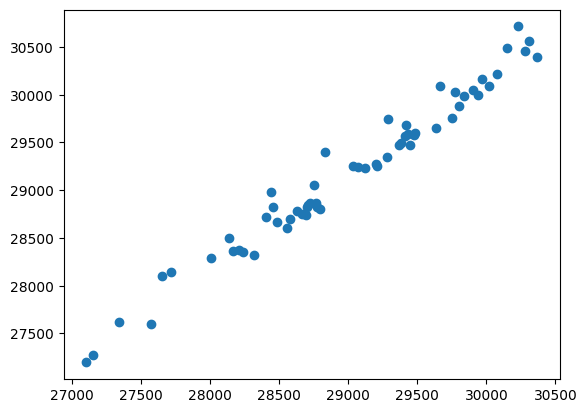

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202101_03
y=takane_202101_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/04~06

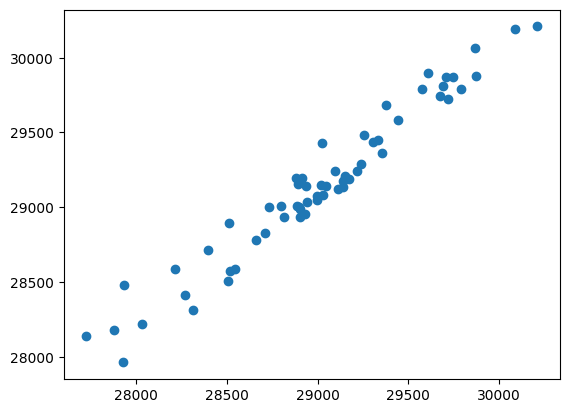

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202104_06
y=takane_202104_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/07~09

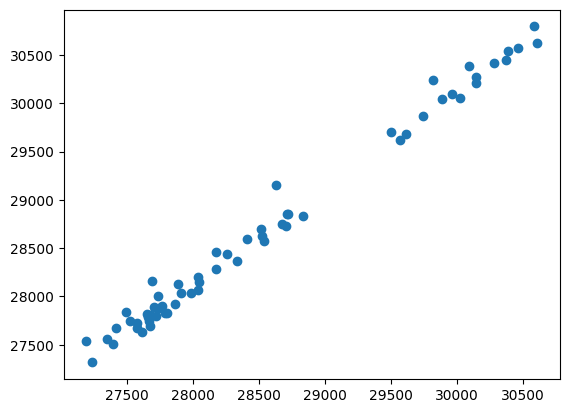

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202107_09
y=takane_202107_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021/10~12

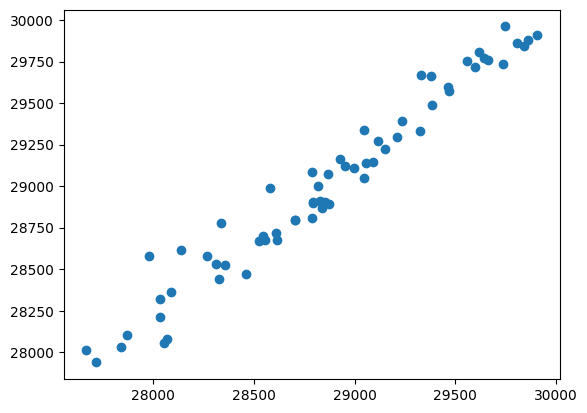

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202110_12
y=takane_202110_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2021

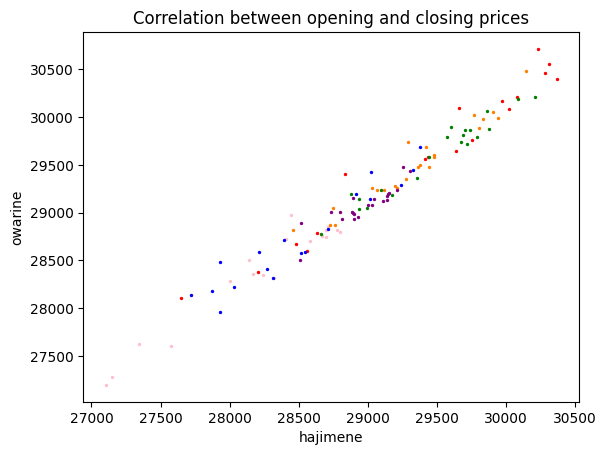

In [ ]:
plt.scatter(hajimene_202101, takane_202101, c="pink", s=2)
plt.scatter(hajimene_202102, takane_202102, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202103, takane_202103, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202104, takane_202104, c="green", s=2)
plt.scatter(hajimene_202105, takane_202105, c="blue", s=2)
plt.scatter(hajimene_202106, takane_202106, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

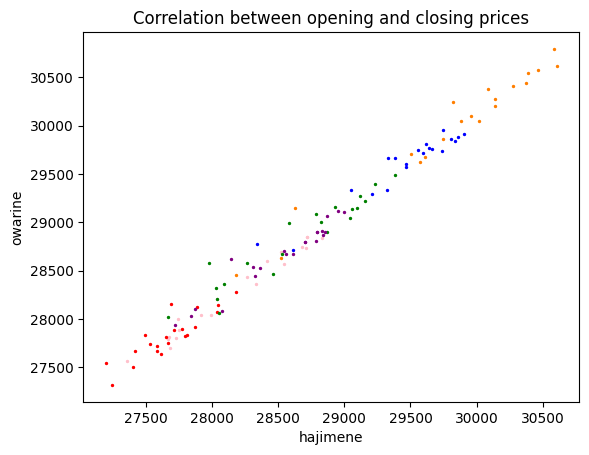

In [ ]:
plt.scatter(hajimene_202107, takane_202107, c="pink", s=2)
plt.scatter(hajimene_202108, takane_202108, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202109, takane_202109, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202110, takane_202110, c="green", s=2)
plt.scatter(hajimene_202111, takane_202111, c="blue", s=2)
plt.scatter(hajimene_202112, takane_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022/01~03

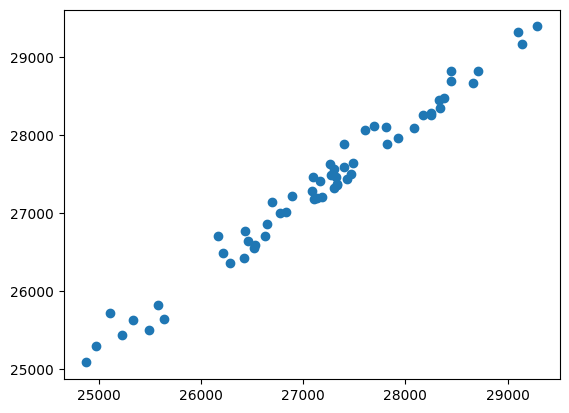

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202201_03
y=takane_202201_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/04~06

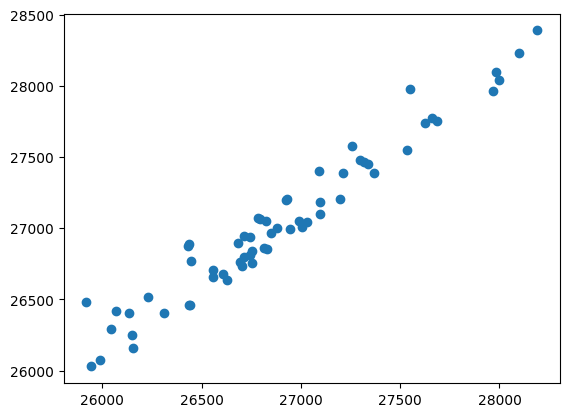

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202204_06
y=takane_202204_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/07~09

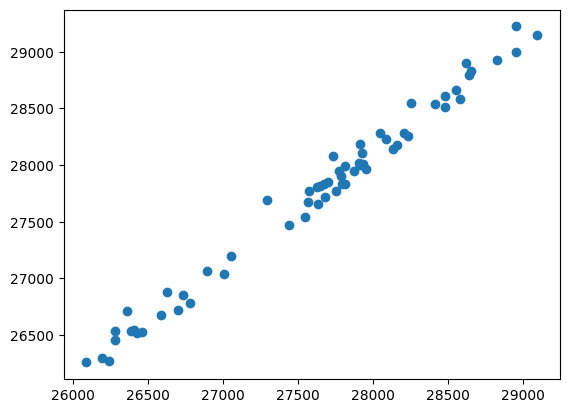

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202207_09
y=takane_202207_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022/10~12

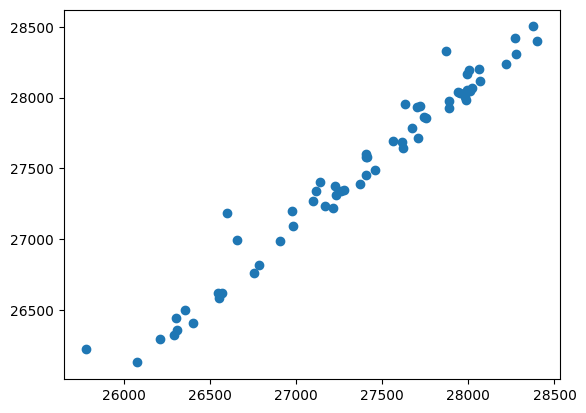

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202210_12
y=takane_202210_12
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2022

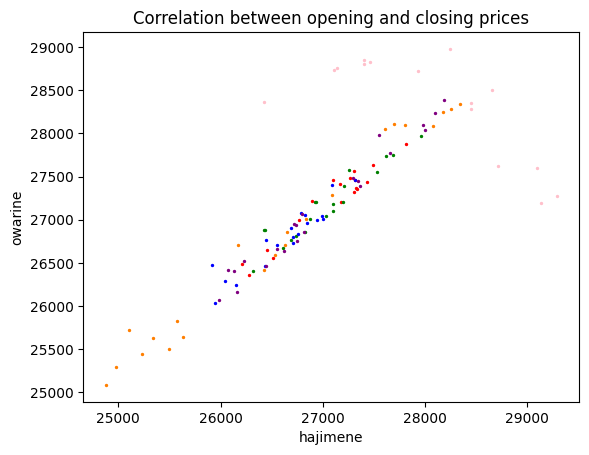

In [ ]:
plt.scatter(hajimene_202201, takane_202201, c="pink", s=2)
plt.scatter(hajimene_202202, takane_202202, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202203, takane_202203, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202204, takane_202204, c="green", s=2)
plt.scatter(hajimene_202205, takane_202205, c="blue", s=2)
plt.scatter(hajimene_202206, takane_202206, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

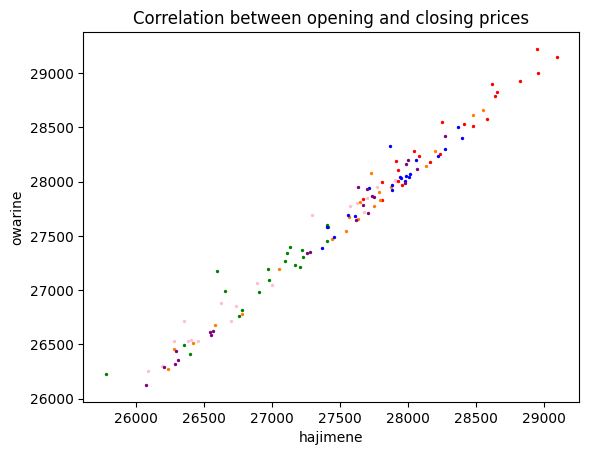

In [ ]:
plt.scatter(hajimene_202207, takane_202207, c="pink", s=2)
plt.scatter(hajimene_202208, takane_202208, c="red", s=2)#mediumvioletred
plt.scatter(hajimene_202209, takane_202209, c="#ff7f00", s=2)#yellow
plt.scatter(hajimene_202210, takane_202210, c="green", s=2)
plt.scatter(hajimene_202211, takane_202211, c="blue", s=2)
plt.scatter(hajimene_202212, takane_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023/01~03

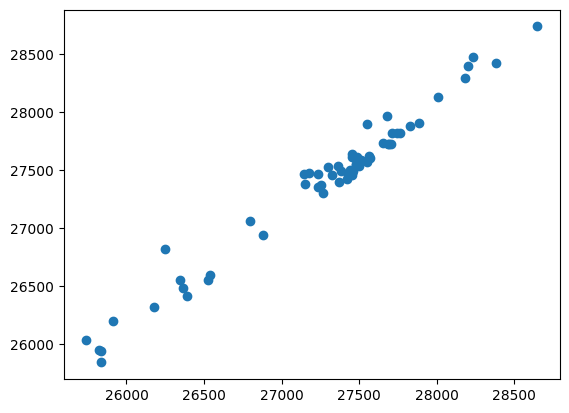

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202301_03
y=takane_202301_03
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/04~06

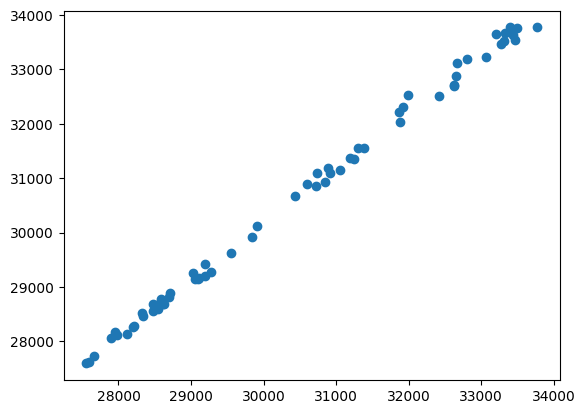

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202304_06
y=takane_202304_06
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/07~09

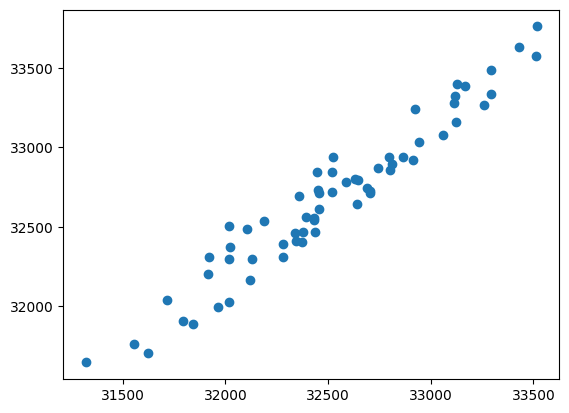

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202307_09
y=takane_202307_09
line1=ax1.scatter(x,y) #散布図を描く
plt.show()

### 2023/10~12

KeyError: 0

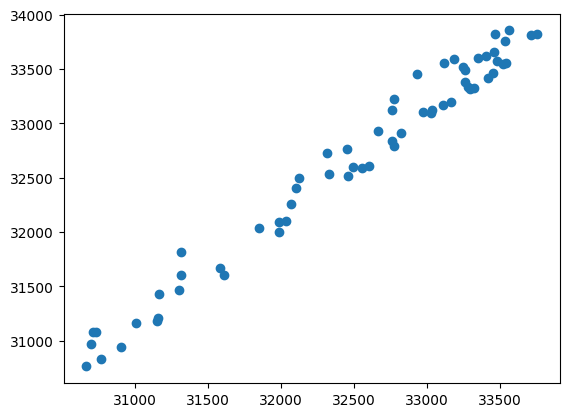

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x=hajimene_202310_12
y=takane_202310_12

labels = [nikkeiheikin_data.loc[num, '日付'] for num in range(0,len(x))]

ax1.scatter(x,y) #散布図を描く

for i, label in enumerate(labels):
    plt.text(x[i], y[i],label)

plt.show()

## 高値・安値

### 2020

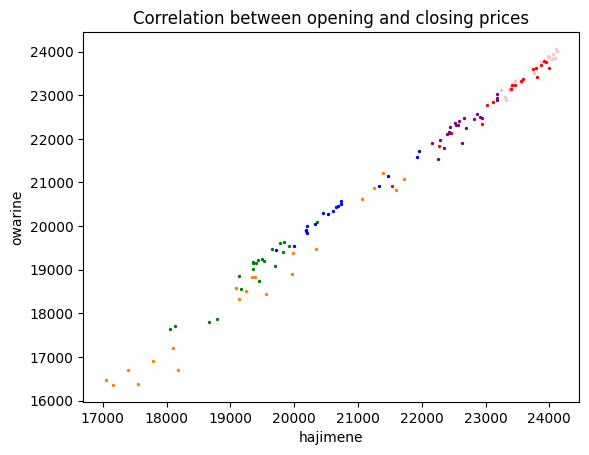

In [ ]:
plt.scatter(takane_202001, yasune_202001, c="pink", s=2)
plt.scatter(takane_202002, yasune_202002, c="red", s=2)#mediumvioletred
plt.scatter(takane_202003, yasune_202003, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202004, yasune_202004, c="green", s=2)
plt.scatter(takane_202005, yasune_202005, c="blue", s=2)
plt.scatter(takane_202006, yasune_202006, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

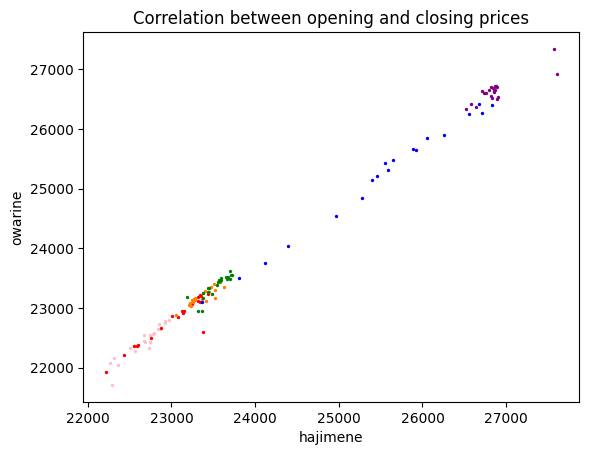

In [ ]:
plt.scatter(takane_202007, yasune_202007, c="pink", s=2)
plt.scatter(takane_202008, yasune_202008, c="red", s=2)#mediumvioletred
plt.scatter(takane_202009, yasune_202009, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202010, yasune_202010, c="green", s=2)
plt.scatter(takane_202011, yasune_202011, c="blue", s=2)
plt.scatter(takane_202012, yasune_202012, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2021

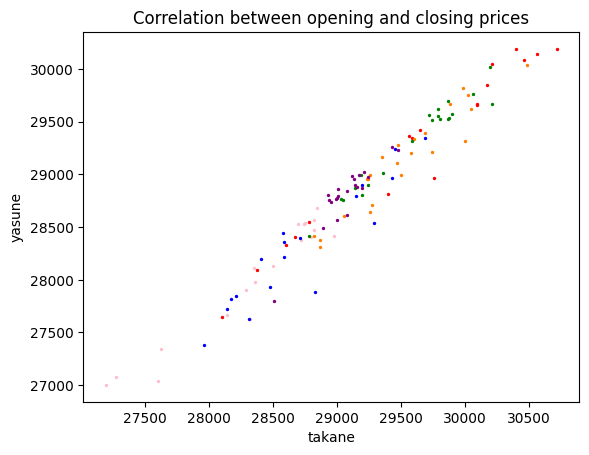

In [ ]:
plt.scatter(takane_202101, yasune_202101, c="pink", s=2)
plt.scatter(takane_202102, yasune_202102, c="red", s=2)#mediumvioletred
plt.scatter(takane_202103, yasune_202103, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202104, yasune_202104, c="green", s=2)
plt.scatter(takane_202105, yasune_202105, c="blue", s=2)
plt.scatter(takane_202106, yasune_202106, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

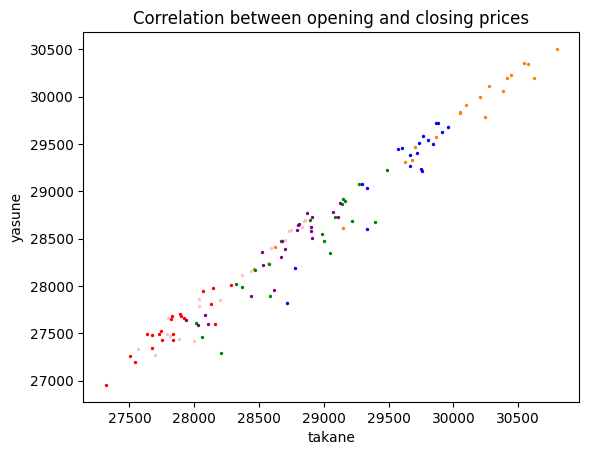

In [ ]:
plt.scatter(takane_202107, yasune_202107, c="pink", s=2)
plt.scatter(takane_202108, yasune_202108, c="red", s=2)#mediumvioletred
plt.scatter(takane_202109, yasune_202109, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202110, yasune_202110, c="green", s=2)
plt.scatter(takane_202111, yasune_202111, c="blue", s=2)
plt.scatter(takane_202112, yasune_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022

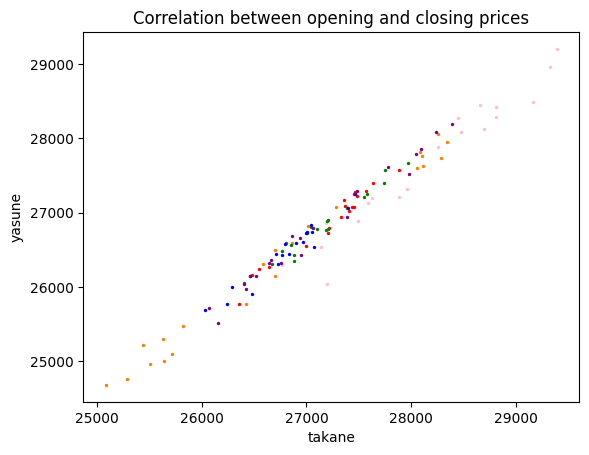

In [ ]:
plt.scatter(takane_202201, yasune_202201, c="pink", s=2)
plt.scatter(takane_202202, yasune_202202, c="red", s=2)#mediumvioletred
plt.scatter(takane_202203, yasune_202203, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202204, yasune_202204, c="green", s=2)
plt.scatter(takane_202205, yasune_202205, c="blue", s=2)
plt.scatter(takane_202206, yasune_202206, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

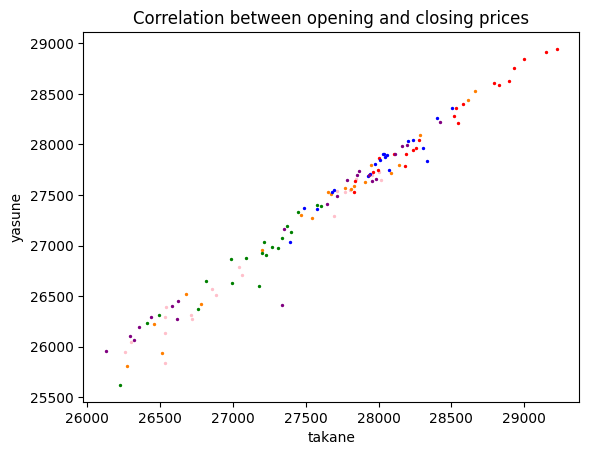

In [ ]:
plt.scatter(takane_202207, yasune_202207, c="pink", s=2)
plt.scatter(takane_202208, yasune_202208, c="red", s=2)#mediumvioletred
plt.scatter(takane_202209, yasune_202209, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202210, yasune_202210, c="green", s=2)
plt.scatter(takane_202211, yasune_202211, c="blue", s=2)
plt.scatter(takane_202212, yasune_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023

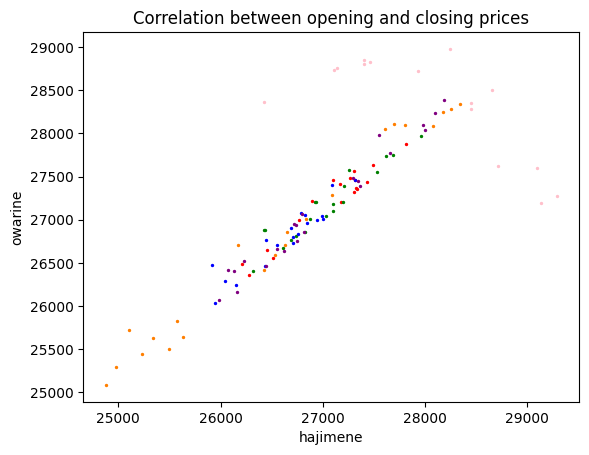

In [ ]:
plt.scatter(takane_202301, yasune_202301, c="pink", s=2)
plt.scatter(takane_202302, yasune_202302, c="red", s=2)#mediumvioletred
plt.scatter(takane_202303, yasune_202303, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202304, yasune_202304, c="green", s=2)
plt.scatter(takane_202305, yasune_202305, c="blue", s=2)
plt.scatter(takane_202306, yasune_202306, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

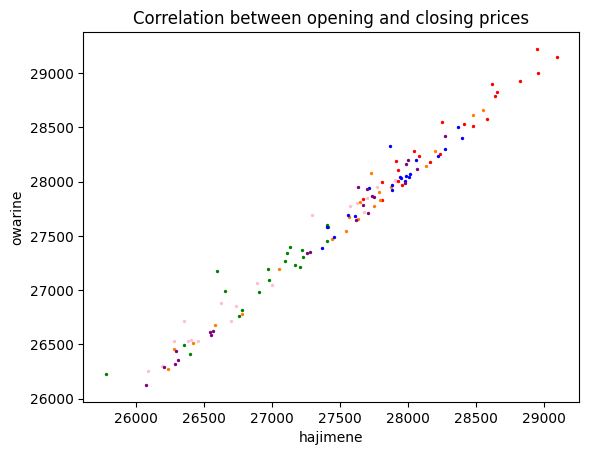

In [ ]:
plt.scatter(takane_202307, yasune_202307, c="pink", s=2)
plt.scatter(takane_202308, yasune_202308, c="red", s=2)#mediumvioletred
plt.scatter(takane_202309, yasune_202309, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202310, yasune_202310, c="green", s=2)
plt.scatter(hajimene_202311, takane_202311, c="blue", s=2)
plt.scatter(hajimene_202312, takane_202312, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

## 高値・終値

### 2020

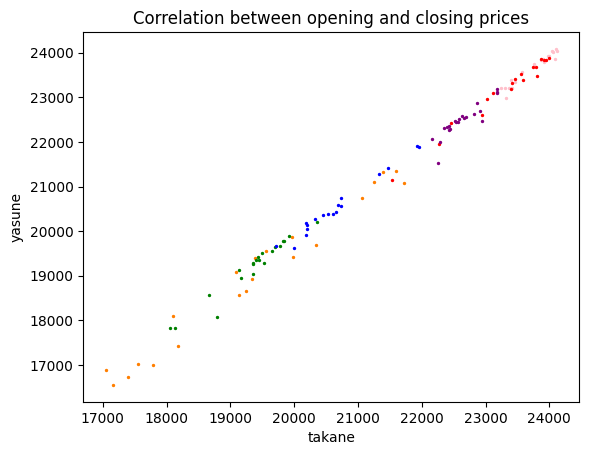

In [ ]:
plt.scatter(takane_202001, owarine_202001, c="pink", s=2)
plt.scatter(takane_202002, owarine_202002, c="red", s=2)#mediumvioletred
plt.scatter(takane_202003, owarine_202003, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202004, owarine_202004, c="green", s=2)
plt.scatter(takane_202005, owarine_202005, c="blue", s=2)
plt.scatter(takane_202006, owarine_202006, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

In [ ]:
plt.scatter(takane_202007, owarine_202007, c="pink", s=2)
plt.scatter(takane_202008, owarine_202008, c="red", s=2)#mediumvioletred
plt.scatter(takane_202009, owarine_202009, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202010, owarine_202010, c="green", s=2)
plt.scatter(takane_202011, owarine_202011, c="blue", s=2)
plt.scatter(takane_202012, owarine_202012, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

NameError: name 'plt' is not defined

### 2021

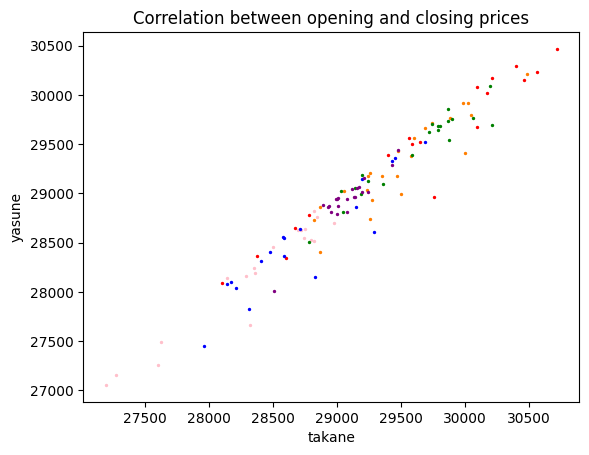

In [ ]:
plt.scatter(takane_202101, owarine_202101, c="pink", s=2)
plt.scatter(takane_202102, owarine_202102, c="red", s=2)#mediumvioletred
plt.scatter(takane_202103, owarine_202103, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202104, owarine_202104, c="green", s=2)
plt.scatter(takane_202105, owarine_202105, c="blue", s=2)
plt.scatter(takane_202106, owarine_202106, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

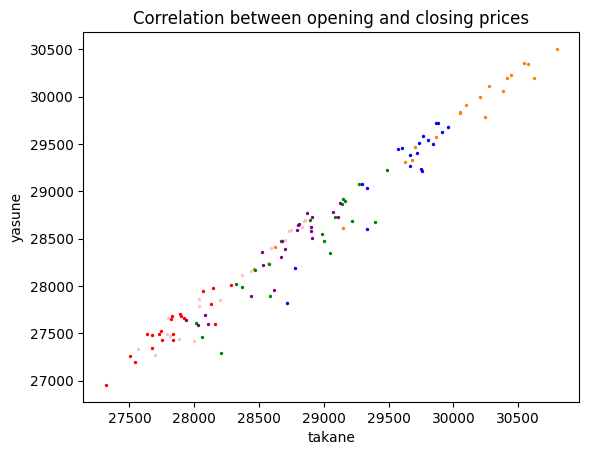

In [ ]:
plt.scatter(takane_202107, owarine_202107, c="pink", s=2)
plt.scatter(takane_202108, owarine_202108, c="red", s=2)#mediumvioletred
plt.scatter(takane_202109, owarine_202109, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202110, owarine_202110, c="green", s=2)
plt.scatter(takane_202111, owarine_202111, c="blue", s=2)
plt.scatter(takane_202112, owarine_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022

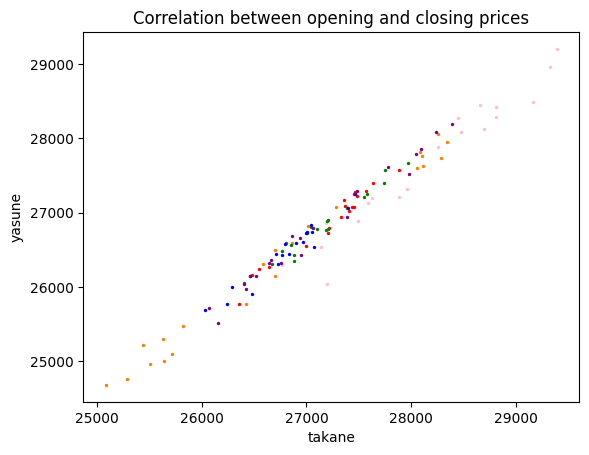

In [ ]:
plt.scatter(takane_202201, owarine_202201, c="pink", s=2)
plt.scatter(takane_202202, owarine_202202, c="red", s=2)#mediumvioletred
plt.scatter(takane_202203, owarine_202203, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202204, owarine_202204, c="green", s=2)
plt.scatter(takane_202205, owarine_202205, c="blue", s=2)
plt.scatter(takane_202206, owarine_202206, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

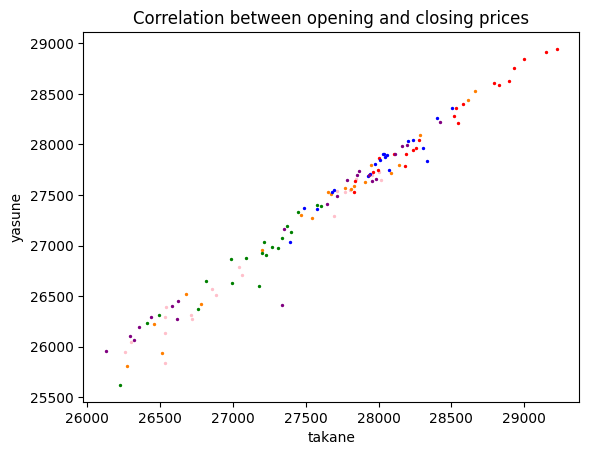

In [ ]:
plt.scatter(takane_202207, owarine_202207, c="pink", s=2)
plt.scatter(takane_202208, owarine_202208, c="red", s=2)#mediumvioletred
plt.scatter(takane_202209, owarine_202209, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202210, owarine_202210, c="green", s=2)
plt.scatter(takane_202211, owarine_202211, c="blue", s=2)
plt.scatter(takane_202212, owarine_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023

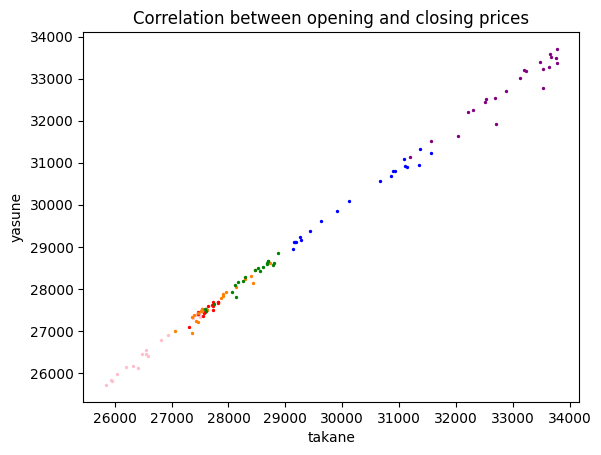

In [ ]:
plt.scatter(takane_202301, owarine_202301, c="pink", s=2)
plt.scatter(takane_202302, owarine_202302, c="red", s=2)#mediumvioletred
plt.scatter(takane_202303, owarine_202303, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202304, owarine_202304, c="green", s=2)
plt.scatter(takane_202305, owarine_202305, c="blue", s=2)
plt.scatter(takane_202306, owarine_202306, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

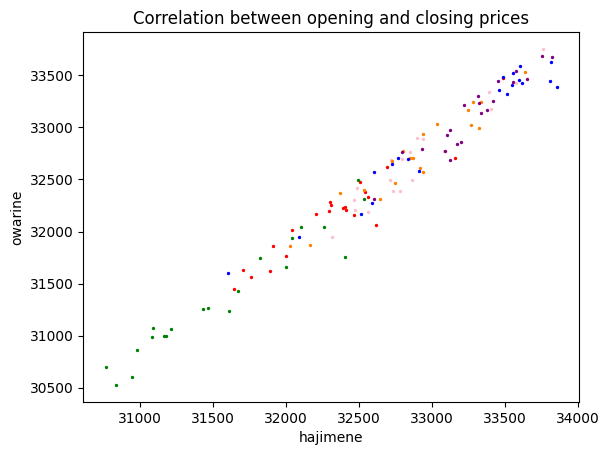

In [ ]:
plt.scatter(takane_202307, owarine_202307, c="pink", s=2)
plt.scatter(takane_202308, owarine_202308, c="red", s=2)#mediumvioletred
plt.scatter(takane_202309, owarine_202309, c="#ff7f00", s=2)#yellow
plt.scatter(takane_202310, owarine_202310, c="green", s=2)
plt.scatter(takane_202311, owarine_202311, c="blue", s=2)
plt.scatter(takane_202312, owarine_202312, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

## 安値・終値

### 2020

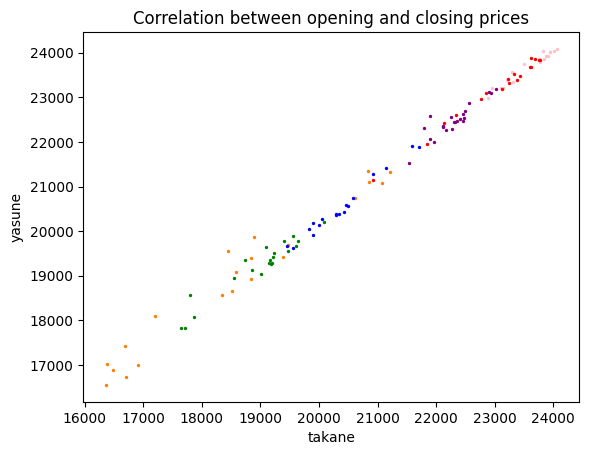

In [ ]:
plt.scatter(yasune_202001, owarine_202001, c="pink", s=2)
plt.scatter(yasune_202002, owarine_202002, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202003, owarine_202003, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202004, owarine_202004, c="green", s=2)
plt.scatter(yasune_202005, owarine_202005, c="blue", s=2)
plt.scatter(yasune_202006, owarine_202006, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

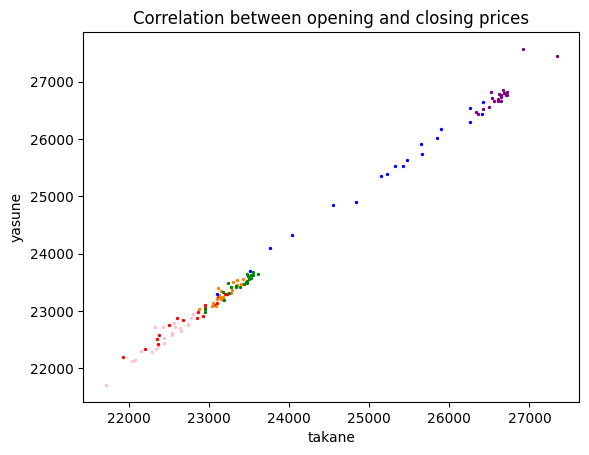

In [ ]:
plt.scatter(yasune_202007, owarine_202007, c="pink", s=2)
plt.scatter(yasune_202008, owarine_202008, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202009, owarine_202009, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202010, owarine_202010, c="green", s=2)
plt.scatter(yasune_202011, owarine_202011, c="blue", s=2)
plt.scatter(yasune_202012, owarine_202012, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2021

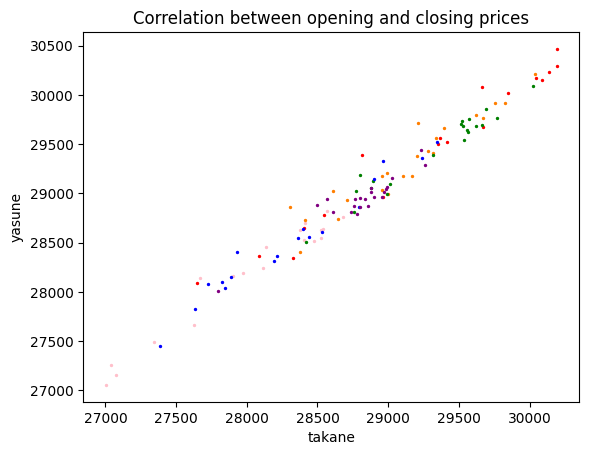

In [ ]:
plt.scatter(yasune_202101, owarine_202101, c="pink", s=2)
plt.scatter(yasune_202102, owarine_202102, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202103, owarine_202103, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202104, owarine_202104, c="green", s=2)
plt.scatter(yasune_202105, owarine_202105, c="blue", s=2)
plt.scatter(yasune_202106, owarine_202106, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

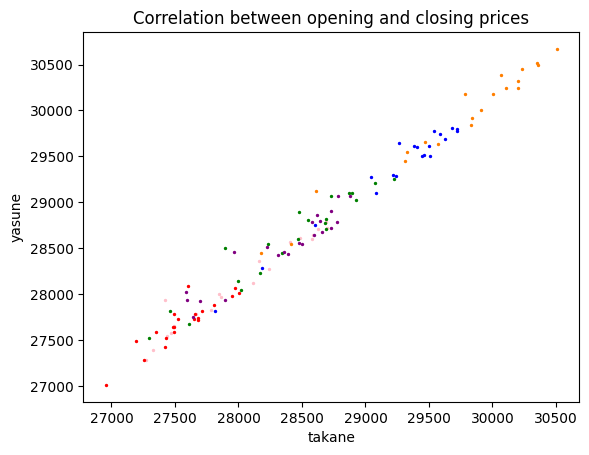

In [ ]:
plt.scatter(yasune_202107, owarine_202107, c="pink", s=2)
plt.scatter(yasune_202108, owarine_202108, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202109, owarine_202109, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202110, owarine_202110, c="green", s=2)
plt.scatter(yasune_202111, owarine_202111, c="blue", s=2)
plt.scatter(yasune_202112, owarine_202112, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2022

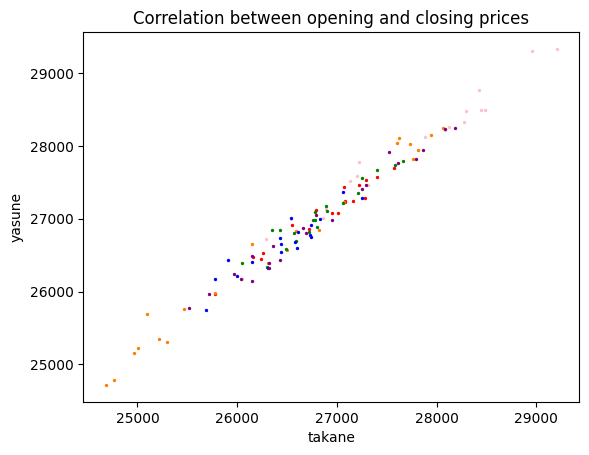

In [ ]:
plt.scatter(yasune_202201, owarine_202201, c="pink", s=2)
plt.scatter(yasune_202202, owarine_202202, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202203, owarine_202203, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202204, owarine_202204, c="green", s=2)
plt.scatter(yasune_202205, owarine_202205, c="blue", s=2)
plt.scatter(yasune_202206, owarine_202206, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

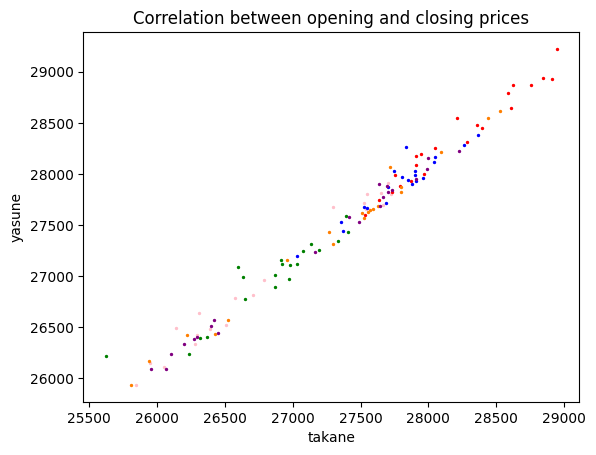

In [ ]:
plt.scatter(yasune_202207, owarine_202207, c="pink", s=2)
plt.scatter(yasune_202208, owarine_202208, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202209, owarine_202209, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202210, owarine_202210, c="green", s=2)
plt.scatter(yasune_202211, owarine_202211, c="blue", s=2)
plt.scatter(yasune_202212, owarine_202212, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

### 2023

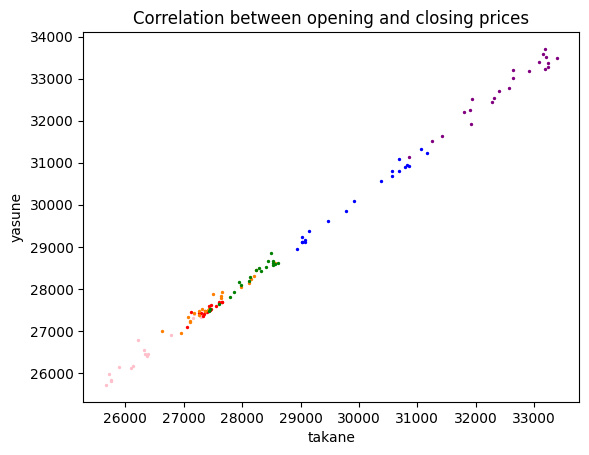

In [ ]:
plt.scatter(yasune_202301, owarine_202301, c="pink", s=2)
plt.scatter(yasune_202302, owarine_202302, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202303, owarine_202303, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202304, owarine_202304, c="green", s=2)
plt.scatter(yasune_202305, owarine_202305, c="blue", s=2)
plt.scatter(yasune_202306, owarine_202306, c="purple", s=2)

#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("takane")
plt.ylabel("yasune")
plt.title("Correlation between opening and closing prices")
plt.show()

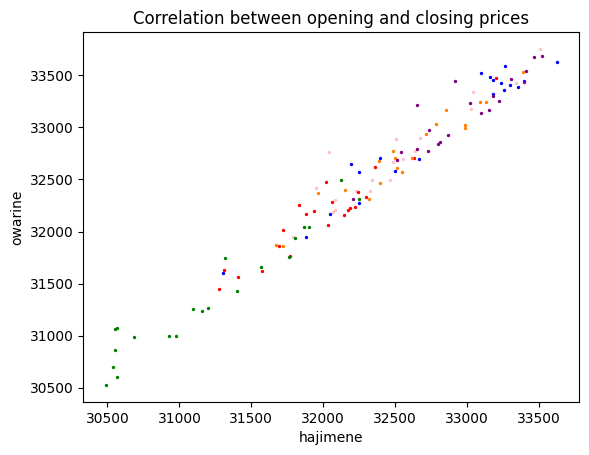

In [ ]:
plt.scatter(yasune_202307, owarine_202307, c="pink", s=2)
plt.scatter(yasune_202308, owarine_202308, c="red", s=2)#mediumvioletred
plt.scatter(yasune_202309, owarine_202309, c="#ff7f00", s=2)#yellow
plt.scatter(yasune_202310, owarine_202310, c="green", s=2)
plt.scatter(yasune_202311, owarine_202311, c="blue", s=2)
plt.scatter(yasune_202312, owarine_202312, c="purple", s=2)


#plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel("hajimene")
plt.ylabel("owarine")
plt.title("Correlation between opening and closing prices")
plt.show()

# nikkeiheikin_data バブルチャート

# nikkeiheikin_data ランダムウォーク なし

# nikkeiheikin_data 相関行列

In [ ]:
nikkeiheikin_data_nan.corr()

<ipython-input-20-8274f15c0247>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nikkeiheikin_data_nan.corr()


始値        高値        安値        終値
始値  1.000000  0.999251  0.998916  0.998002
高値  0.999251  1.000000  0.998901  0.999111
安値  0.998916  0.998901  1.000000  0.999226
終値  0.998002  0.999111  0.999226  1.000000

# nikkeiheikin_data 決定係数・回帰係数

In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = nikkeiheikin_data.drop('始値', axis=1)
y = nikkeiheikin_data['始値']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

NameError: name 'nikkeiheikin_data' is not defined

# nikkeiheikin_data ロジスティック回帰(正解率(train,test))

# nikkeiheikin_data ロジスティック回帰+標準化処理

# nikkeiheikin_data リッジ回帰

# nikkeiheikin_data ...が...である場合のエントロピー

# nikkeiheikin_data 決定木

# nikkeiheikin_data 正解率の出力

# nikkeiheikin_data 標準化(正解率(train,test))

# nikkeiheikin_data k-means法

# nikkeiheikin_data 重心→クラスター番号→件数

# nikkeiheikin_data エルボー法

# nikkeiheikin_data クラスター番号のデータを結合